In [436]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Label Encoder
from sklearn.preprocessing import LabelEncoder

#Divide Dataset
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

#Transform features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#Graphs and metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, accuracy_score

#Tables and tests
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

#Traditional Logistic Regression
import statsmodels.api as sm

#ogistic Regression (ML version)
from sklearn.linear_model import LogisticRegression

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

#XGBOOST
from xgboost import XGBClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# RandomForest
from sklearn.ensemble import RandomForestClassifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# SVM transformed not tuning
from sklearn.svm import SVC

#CNN
from sklearn.utils.class_weight import compute_class_weight
import os, random, numpy as np, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [507]:
df = pd.read_excel("Score Dataset.xlsx")


# Data Exploration

In [508]:
#Initial dataset
display(df.head())
# Missing Values
print("\nNumber of missing values:",df.info())
print("\nNumber of missing values:",df.isna().sum())

,Gender,Product,Income_Level,Marital_Status,Job_Tenure,Age,Default
0,F,Consumer,<= 1 MW,Single,103,32,0
1,M,Consumer,> 1 & < 2 MW,Single,37,35,0
2,M,Consumer,> 10 &< 20 MW,Single,15,51,0
3,M,Consumer,> 1 & < 2 MW,Married,0,29,0
4,M,Consumer,> 1 & < 2 MW,Married,0,29,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48393 entries, 0 to 48392
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          48393 non-null  object
 1   Product         48393 non-null  object
 2   Income_Level    48393 non-null  object
 3   Marital_Status  48393 non-null  object
 4   Job_Tenure      48393 non-null  int64 
 5   Age             48393 non-null  int64 
 6   Default         48393 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.6+ MB

Number of missing values: None

Number of missing values: Gender            0
Product           0
Income_Level      0
Marital_Status    0
Job_Tenure        0
Age               0
Default           0
dtype: int64


In [509]:
print("\nDefault count:",df['Default'].value_counts())


print("\nDefault percentage:",df['Default'].value_counts(normalize=True))



Default count: Default
0    47702
1      691
Name: count, dtype: int64

Default percentage: Default
0    0.985721
1    0.014279
Name: proportion, dtype: float64


In [510]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,48393,2,M,29407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,48393,2,Consumer,43903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Level,48393,7,> 1 & < 2 MW,23363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,48393,5,Single,24168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Tenure,48393.0,NaN,NaN,NaN,54.453599,63.924672,0.0,14.0,29.0,65.0,505.0
Age,48393.0,NaN,NaN,NaN,35.014775,9.841203,18.0,27.0,34.0,42.0,78.0
Default,48393.0,NaN,NaN,NaN,0.014279,0.118639,0.0,0.0,0.0,0.0,1.0


In [511]:
print("\nGender:",df['Gender'].unique())

print("\nIncome Level:",df['Income_Level'].unique())


Gender: ['F' 'M']

Income Level: ['<= 1 MW' '> 1 & < 2 MW' '> 10 &< 20 MW' '> 4 & <10 MW' '> 3 & <4 MW'
 '> 2 & <3 MW' '> 20  MW']


In [512]:
# Descriptive Stats
# Cualitatives (frequencies)
for col in ['Gender','Product','Income_Level','Marital_Status']:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True).head(10))



Gender
Gender
M    0.607671
F    0.392329
Name: proportion, dtype: float64

Product
Product
Consumer    0.907218
Mortgage    0.092782
Name: proportion, dtype: float64

Income_Level
Income_Level
> 1 & < 2 MW     0.482776
<= 1 MW          0.377327
> 2 & <3 MW      0.095634
> 3 & <4 MW      0.028145
> 4 & <10 MW     0.014858
> 10 &< 20 MW    0.000868
> 20  MW         0.000393
Name: proportion, dtype: float64

Marital_Status
Marital_Status
Single        0.499411
Married       0.292811
Common Law    0.183642
Separated     0.017337
Widow         0.006799
Name: proportion, dtype: float64


In [209]:
#Checking for duplicates
print("\nNumber of Duplicates:",df.duplicated().sum())

print("\nMissing values:",df.isna().sum())


Duplicates: 19291

Missing: Genre             0
Product           0
Income_Level      0
Marital_Status    0
Job_Tenure        0
Age               0
Default           0
log_Age           0
log_Job_Tenure    0
Job_Tenure_Bin    0
Age_Bin           0
dtype: int64


In [210]:
print("\nVariables:",df.columns)


Variables: Index(['Genre', 'Product', 'Income_Level', 'Marital_Status', 'Job_Tenure',
       'Age', 'Default', 'log_Age', 'log_Job_Tenure', 'Job_Tenure_Bin',
       'Age_Bin'],
      dtype='object')


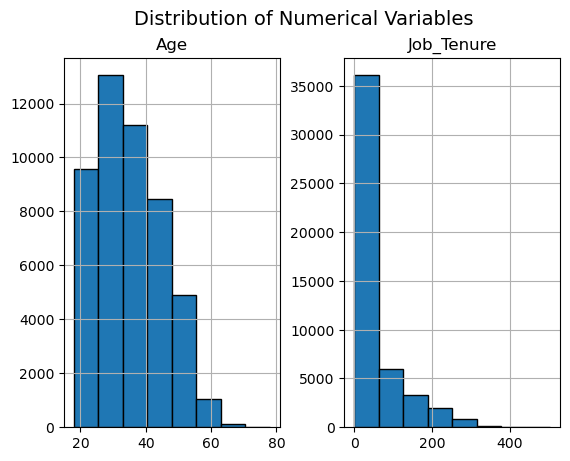

In [89]:
df[['Age','Job_Tenure']].hist(bins=8,edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize = 14)
plt.show()

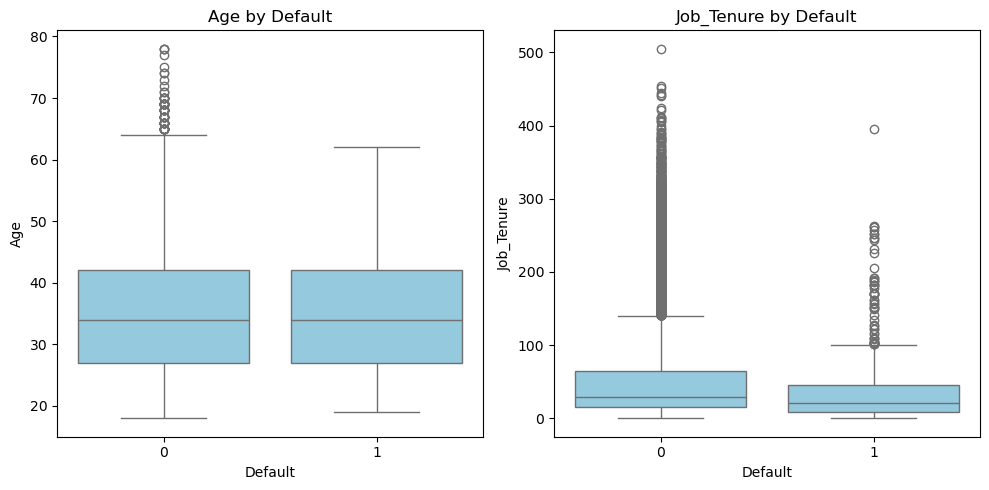

In [152]:
#Boxplots: Numeric variables vs Default
plt.figure(figsize=(10,5))
for i, col in enumerate (['Age','Job_Tenure']):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df,x='Default',y=col, color='skyblue')
    plt.title(f"{col} by Default")

plt.tight_layout()
plt.show()


In [103]:
#Checking outliers: Age > 65 years
df.query("Age>65")

,Genre,Product,Income_Level,Marital_Status,Job_Tenure,Age,Default
330,M,Consumer,<= 1 MW,Married,38,67,0
1411,F,Mortgage,<= 1 MW,Married,4,66,0
3691,M,Mortgage,> 2 & <3 MW,Married,315,70,0
5026,M,Consumer,<= 1 MW,Married,11,69,0
7311,M,Mortgage,<= 1 MW,Married,71,77,0
7318,M,Consumer,<= 1 MW,Married,66,68,0
7324,M,Consumer,<= 1 MW,Single,25,75,0
7337,M,Consumer,<= 1 MW,Single,14,74,0
7344,M,Consumer,<= 1 MW,Common Law,307,78,0
7360,M,Consumer,> 1 & < 2 MW,Married,123,71,0


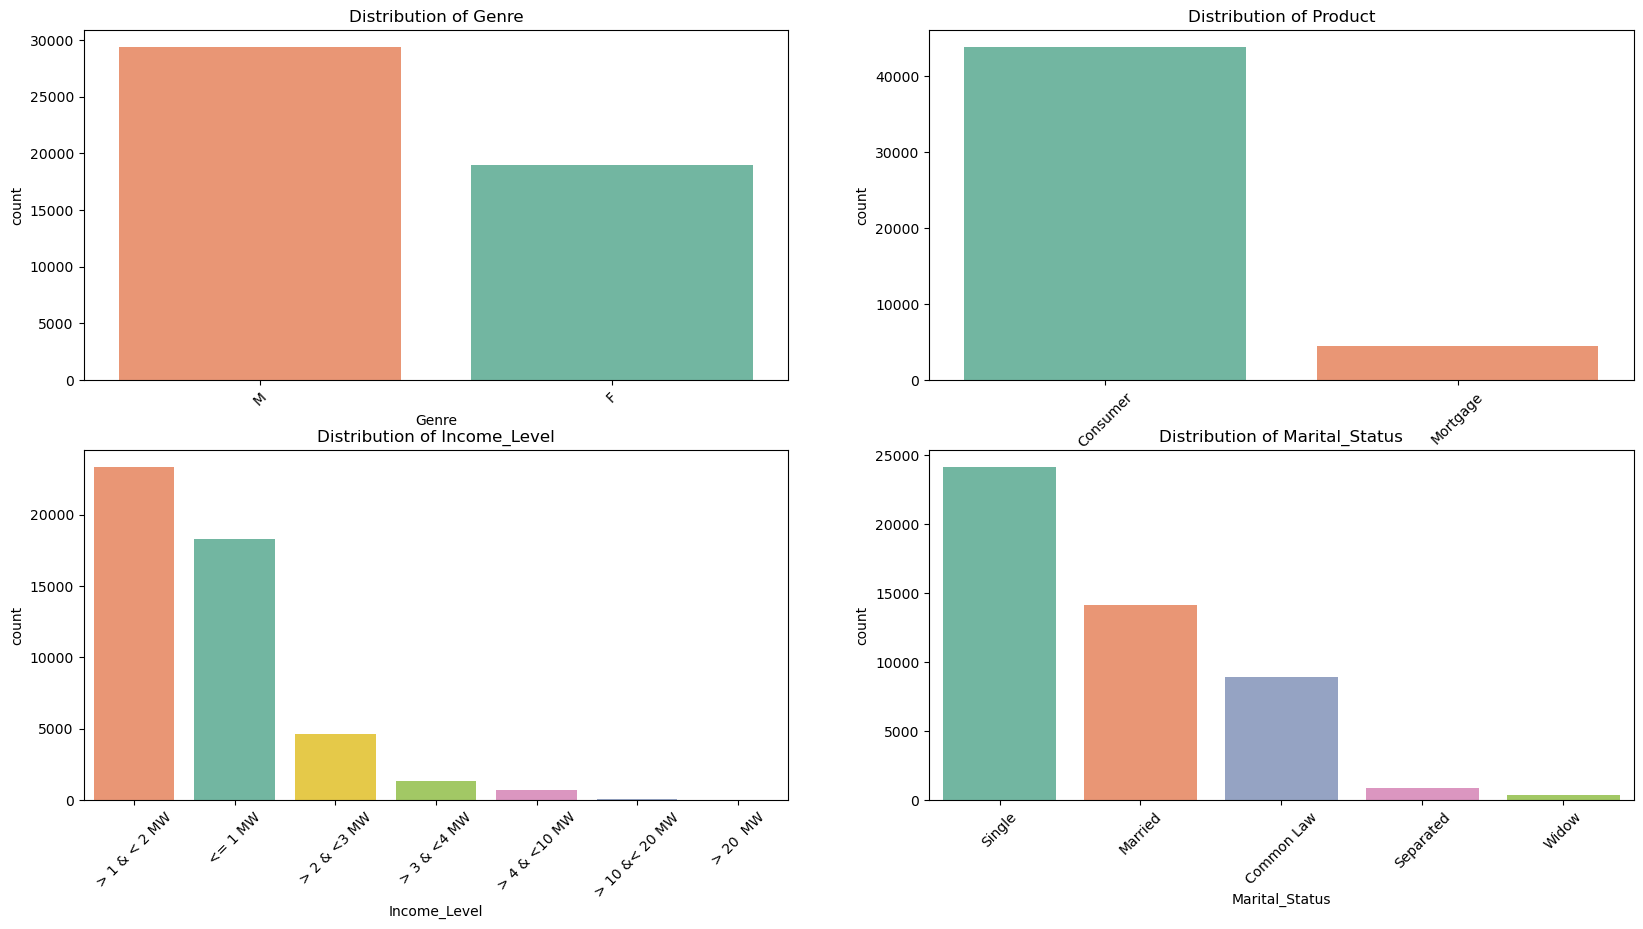

In [122]:
Categorical_var = ['Gender','Product','Income_Level','Marital_Status']
plt.figure(figsize=(20,10))
for i, col in enumerate(Categorical_var):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,hue=col,palette="Set2",order=df[col].value_counts().index,legend=False)    
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

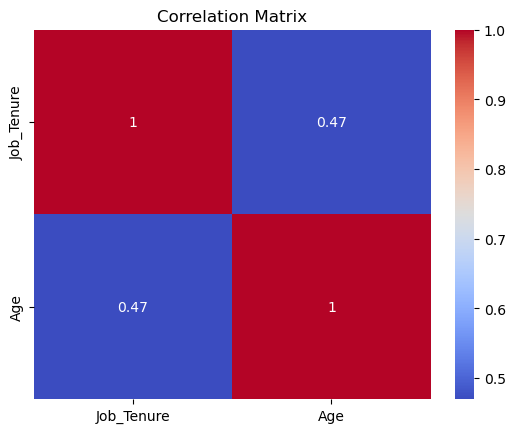

In [430]:
#Correlation of numeric variables vs Default
corr = df[['Job_Tenure','Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [214]:
#What is the customer average age by income level?
df.groupby('Income_Level')['Age'].mean()

Income_Level
<= 1 MW          34.547864
> 1 & < 2 MW     34.413688
> 10 &< 20 MW    47.571429
> 2 & <3 MW      37.747191
> 20  MW         50.789474
> 3 & <4 MW      39.296623
> 4 & <10 MW     39.554937
Name: Age, dtype: float64

In [215]:
#What is the customer average Job Tenure by Gender?
df.groupby('Gender')['Job_Tenure'].mean()

Genre
F    52.778890
M    55.534839
Name: Job_Tenure, dtype: float64

In [216]:
#What is the customer average Job Tenure by income level?
df.groupby('Income_Level')['Job_Tenure'].mean()

Income_Level
<= 1 MW           38.170975
> 1 & < 2 MW      56.046612
> 10 &< 20 MW    100.761905
> 2 & <3 MW       89.502809
> 20  MW         174.578947
> 3 & <4 MW      105.801028
> 4 & <10 MW      87.461752
Name: Job_Tenure, dtype: float64

In [218]:
#What is the customer count default by income level?
df.groupby('Income_Level')['Default'].count()

Income_Level
<= 1 MW          18260
> 1 & < 2 MW     23363
> 10 &< 20 MW       42
> 2 & <3 MW       4628
> 20  MW            19
> 3 & <4 MW       1362
> 4 & <10 MW       719
Name: Default, dtype: int64

In [219]:
#What is the distribution of Job Tenure by Gender and Income Level?
pd.pivot_table(df,values = 'Job_Tenure', index='Gender',columns='Income_Level')

Income_Level,<= 1 MW,> 1 & < 2 MW,> 10 &< 20 MW,> 2 & <3 MW,> 20 MW,> 3 & <4 MW,> 4 & <10 MW
Genre,,,,,,,
F,38.890456,53.897877,110.388889,79.080978,148.666667,95.468652,78.830986
M,37.729161,57.438637,93.541667,96.380918,179.437500,114.906077,95.879121


In [220]:
#What is the customer Job Tenure by Marital Status and Product?
pd.pivot_table(df,values = 'Job_Tenure', index='Marital_Status',columns='Product')

Product,Consumer,Mortgage
Marital_Status,,
Common Law,43.483029,73.003289
Married,67.243549,88.993634
Separated,50.247382,81.226667
Single,44.430755,88.737520
Widow,104.925926,132.101695


In [221]:
#What is the distribution of the default by Age and Job Tenure?
df.groupby('Default')[['Age','Job_Tenure']].mean()

,Age,Job_Tenure
Default,,
0,35.013459,54.705736
1,35.105644,37.047757


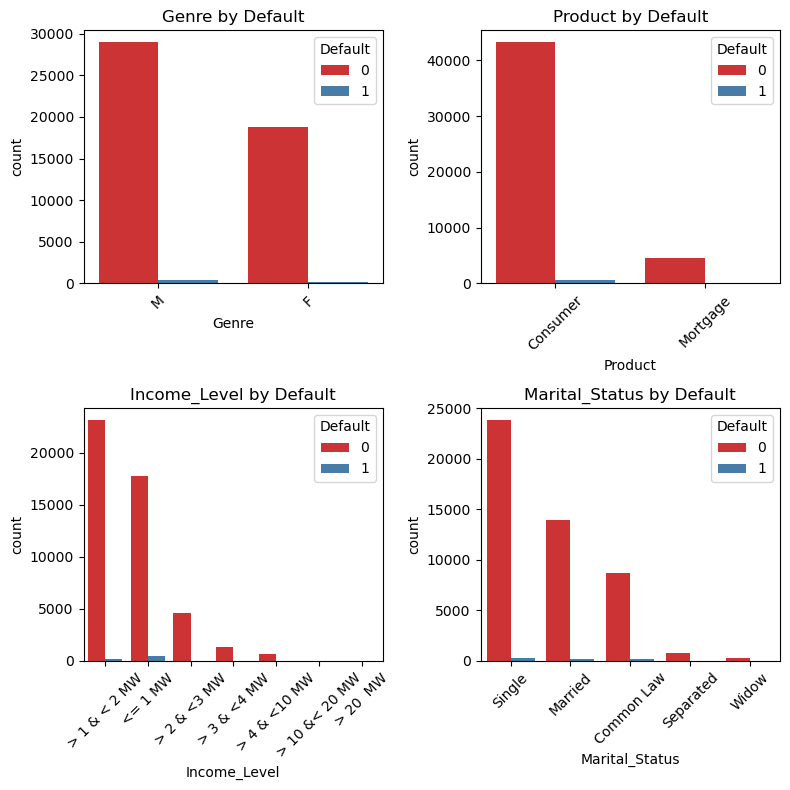

In [222]:
#Cualitative variables by Default
plt.figure(figsize=(8,8))
for i, col in enumerate (Categorical_var):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col, hue='Default', palette='Set1', order=df[col].value_counts().index )
    plt.title(f"{col} by Default")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Assessing each variable using different approaches

### KS for numeric variables

In [163]:
#1. Applying Log to Age y Job_Tenure variables to delete noise

df['log_Age'] = np.log1p(df['Age'])
df['log_Job_Tenure'] = np.log1p(df['Job_Tenure'])

# Distribution
df[['Age','log_Age','Job_Tenure','log_Job_Tenure']].describe()

,Age,log_Age,Job_Tenure,log_Job_Tenure
count,48393.000000,48393.000000,48393.000000,48393.000000
mean,35.014775,3.546989,54.453599,3.419039
std,9.841203,0.272030,63.924672,1.161656
min,18.000000,2.944439,0.000000,0.000000
25%,27.000000,3.332205,14.000000,2.708050
50%,34.000000,3.555348,29.000000,3.401197
75%,42.000000,3.761200,65.000000,4.189655
max,78.000000,4.369448,505.000000,6.226537


In [166]:
#2. KS Test (Kolmogorov-Smirnov)
def ks_test(var, target):
    fpr, tpr, thresholds = roc_curve(target, var)
    ks = max(tpr - fpr)
    return ks

ks_age = ks_test(df['log_Age'], df['Default'])
ks_bonding = ks_test(df['log_Job_Tenure'], df['Default'])

print(f"KS log_Age = {ks_age:.4f}")
print(f"KS log_Job_Tenure = {ks_bonding:.4f}")

KS log_Age = 0.0453
KS log_Job_Tenure = 0.0011


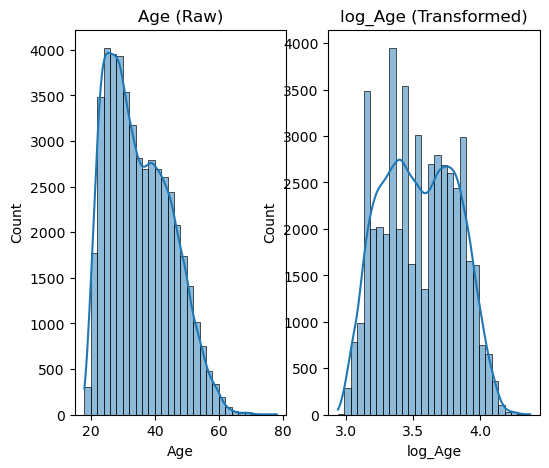

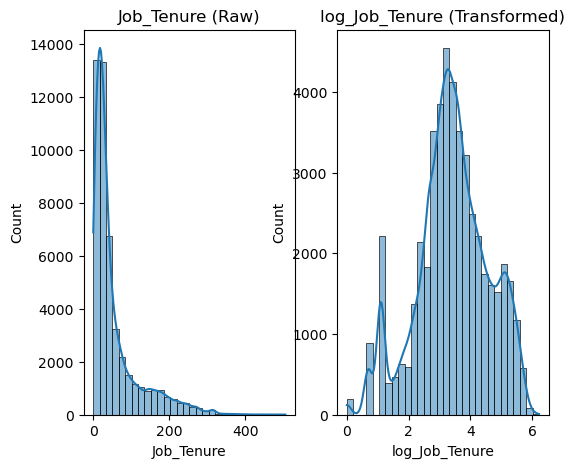

In [174]:
#Raw vs. transformed varables - histograms
# Age
plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age (Raw)")

plt.subplot(1,2,2)
sns.histplot(df['log_Age'], bins=30, kde=True)
plt.title("log_Age (Transformed)")

plt.show()

# Job_Tenure
plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
sns.histplot(df['Job_Tenure'], bins=30, kde=True)
plt.title("Job_Tenure (Raw)")

plt.subplot(1,2,2)
sns.histplot(df['log_Job_Tenure'], bins=30, kde=True)
plt.title("log_Job_Tenure (Transformed)")

plt.show()


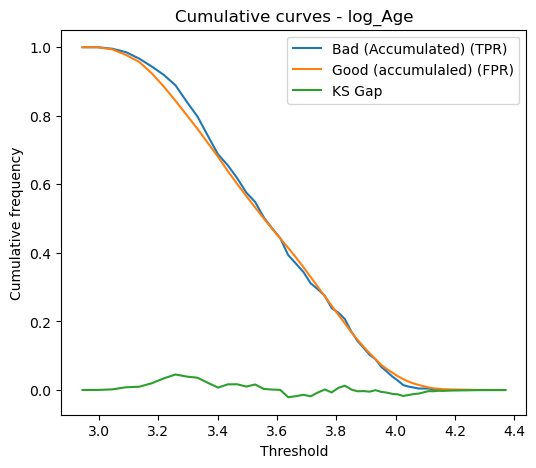

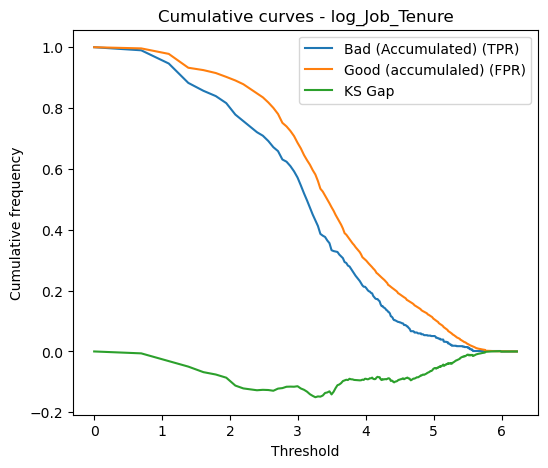

In [177]:
#View the cumulative curves Age variable
def plot_ks(var, target, name):
    fpr, tpr, thresholds = roc_curve(target, var)
    plt.figure(figsize=(6,5))
    plt.plot(thresholds, tpr, label='Bad (Accumulated) (TPR)')
    plt.plot(thresholds, fpr, label='Good (accumulaled) (FPR)')
    plt.plot(thresholds, tpr - fpr, label='KS Gap')
    plt.title(f"Cumulative curves - {name}")
    plt.xlabel("Threshold")
    plt.ylabel("Cumulative frequency")
    plt.legend()
    plt.show()

plot_ks(df['log_Age'], df['Default'], "log_Age")
plot_ks(df['log_Job_Tenure'], df['Default'], "log_Job_Tenure")


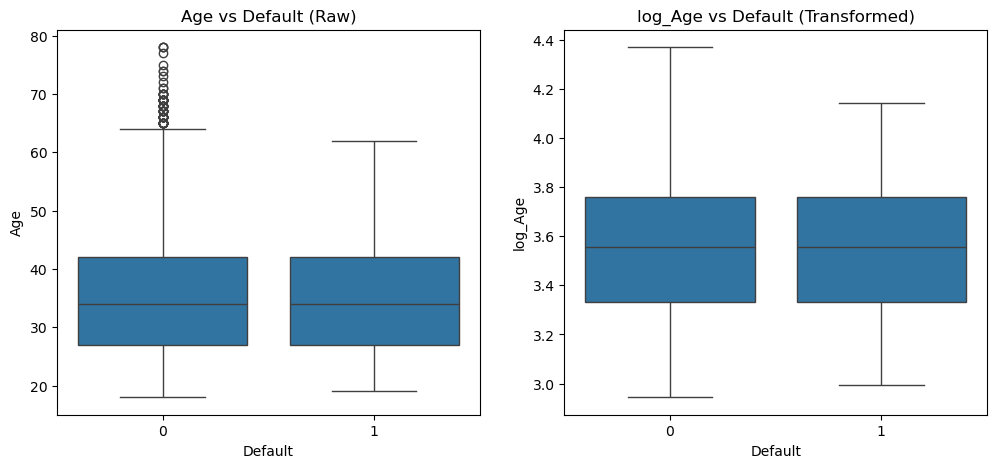

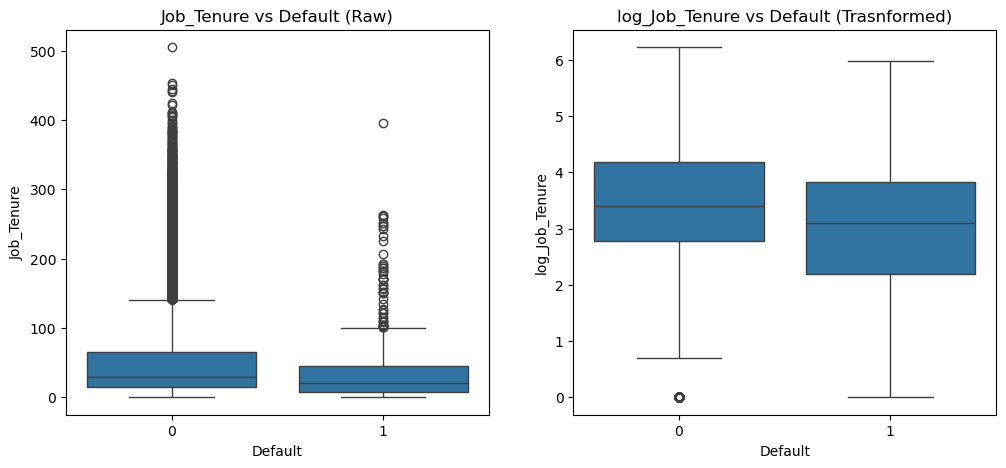

In [179]:
#Boxplots Age, Job_Tenure vs DEFAULT
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Default', y='Age', data=df)
plt.title("Age vs Default (Raw)")

plt.subplot(1,2,2)
sns.boxplot(x='Default', y='log_Age', data=df)
plt.title("log_Age vs Default (Transformed)")
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Default', y='Job_Tenure', data=df)
plt.title("Job_Tenure vs Default (Raw)")

plt.subplot(1,2,2)
sns.boxplot(x='Default', y='log_Job_Tenure', data=df)
plt.title("log_Job_Tenure vs Default (Trasnformed)")
plt.show()

In [181]:
#KS Test
def ks_value(var, target):
    fpr, tpr, thr = roc_curve(target, var)
    return np.max(tpr - fpr)
results = []

for col in ["Age", "log_Age", "Job_Tenure", "log_Job_Tenure"]:
    ks = ks_value(df[col], df["Default"])
    results.append({"Variable": col, "KS": ks})

ks_df = pd.DataFrame(results)
print(ks_df)

         Variable        KS
0             Age  0.045290
1         log_Age  0.045290
2      Job_Tenure  0.001112
3  log_Job_Tenure  0.001112


### Creating Bins - Cualitative variables

In [437]:
#Preparing data

TARGET = "Default"  # 1=default, 0=no default

def woe_iv_from_binned(df, bin_col, target=TARGET, eps=1e-6):
    t = (df.groupby(bin_col, observed=True)[target]
          .agg(['count','sum'])
          .rename(columns={'count':'Total','sum':'Bad'})
          .reset_index()
          .rename(columns={bin_col: 'Bin'}))
    t['Good'] = t['Total'] - t['Bad']

    total_good = t['Good'].sum()
    total_bad  = t['Bad'].sum()

    t['%Good'] = t['Good'] / max(total_good, eps)
    t['%Bad']  = t['Bad']  / max(total_bad,  eps)
    t['WOE']   = np.log((t['%Good'] + eps) / (t['%Bad'] + eps))
    t['IV_part'] = (t['%Good'] - t['%Bad']) * t['WOE']

    iv_total = float(t['IV_part'].sum())
    try:
        t = t.sort_values('Bin', key=lambda s: [x.left if hasattr(x,'left') else -np.inf for x in s])
    except Exception:
        t = t.sort_values('Bin')
    return t, iv_total


In [438]:
# Ensuring Job_Tenure is numeric
bt = pd.to_numeric(df['Job_Tenure'], errors='coerce')

# Definition of bins (in months)
bt_edges = [ -np.inf, 6, 12, 24, 60, np.inf ]
bt_labels = ["0–6m", "6–12m", "12–24m", "24–60m", ">60m"]

df['Job_Tenure_Bin'] = pd.cut(bt, bins=bt_edges, labels=bt_labels, right=True, include_lowest=True)

# Table WOE/IV
bt_woe_table, bt_iv = woe_iv_from_binned(df, 'Job_Tenure_Bin', target=TARGET)

print(bt_woe_table)
print(f"\nIV total Job_Tenure = {bt_iv:.4f}")

      Bin  Total  Bad   Good     %Good      %Bad       WOE   IV_part
0    0–6m   5364  153   5211  0.109241  0.221418 -0.706495  0.079253
1   6–12m   4371   74   4297  0.090080  0.107091 -0.172980  0.002943
2  12–24m  10612  166  10446  0.218985  0.240232 -0.092602  0.001968
3  24–60m  15088  175  14913  0.312628  0.253256  0.210613  0.012505
4    >60m  12958  123  12835  0.269066  0.178003  0.413156  0.037623

IV total Job_Tenure = 0.1343


In [439]:
# Ensuring Age is numeric
age = pd.to_numeric(df['Age'], errors='coerce')

# Definition of bins (in years)
age_edges = [ -np.inf, 25, 35, 45, 55, np.inf ]
age_labels = ["≤25", "26–35", "36–45", "46–55", ">55"]

df['Age_Bin'] = pd.cut(age, bins=age_edges, labels=age_labels, right=True, include_lowest=True)

# Table WOE/IV
age_woe_table, age_iv = woe_iv_from_binned(df, 'Age_Bin', target=TARGET)

print(age_woe_table)
print(f"\nIV total Age = {age_iv:.4f}")

     Bin  Total  Bad   Good     %Good      %Bad       WOE   IV_part
0    ≤25   9572  110   9462  0.198356  0.159190  0.219969  0.008615
1  26–35  17410  275  17135  0.359209  0.397974 -0.102481  0.003973
2  36–45  13224  188  13036  0.273280  0.272069  0.004439  0.000005
3  46–55   7002  111   6891  0.144459  0.160637 -0.106147  0.001717
4    >55   1185    7   1178  0.024695  0.010130  0.891016  0.012977

IV total Age = 0.0273


In [440]:
# Quick post-binning checks (non-blocking)
def sanity_checks(table, min_share=0.05, min_bads=30):
    out = {}
    out['min_population_ok'] = (table['Total'] / table['Total'].sum() >= min_share).all()
    out['min_bad_ok'] = (table['Bad'] >= min_bads).all()
    out['woe_monotonous_aprox'] = table['WOE'].is_monotonic_increasing or table['WOE'].is_monotonic_decreasing
    return out

print("Job_Tenure checks:", sanity_checks(bt_woe_table))
print("\nAge checks:", sanity_checks(age_woe_table))

Job_Tenure checks: {'min_population_ok': True, 'min_bad_ok': True, 'woe_monotonous_aprox': True}

Age checks: {'min_population_ok': False, 'min_bad_ok': False, 'woe_monotonous_aprox': False}


In [441]:
age = pd.to_numeric(df['Age'], errors='coerce')

age_edges_4 = [-np.inf, 25, 35, 45, np.inf]
age_labels_4 = ["≤25", "26–35", "36–45", "≥46"]
df['Age_Bin_4'] = pd.cut(age, bins=age_edges_4, labels=age_labels_4, right=True, include_lowest=True)

# ----  WOE/IV y checks ----
age_woe_table_4, age_iv_4 = woe_iv_from_binned(df, 'Age_Bin_4', target=TARGET)
checks_age_4 = sanity_checks(age_woe_table_4)

print(age_woe_table_4)
print(f"\nIV total Age (4 bins) = {age_iv_4:.4f}")
print("Age checks (4 bins):", checks_age_4)

     Bin  Total  Bad   Good     %Good      %Bad       WOE   IV_part
0    ≤25   9572  110   9462  0.198356  0.159190  0.219969  0.008615
1  26–35  17410  275  17135  0.359209  0.397974 -0.102481  0.003973
2  36–45  13224  188  13036  0.273280  0.272069  0.004439  0.000005
3    ≥46   8187  118   8069  0.169154  0.170767 -0.009489  0.000015

IV total Age (4 bins) = 0.0126
Age checks (4 bins): {'min_population_ok': True, 'min_bad_ok': True, 'woe_monotonous_aprox': False}


### WOE TEST

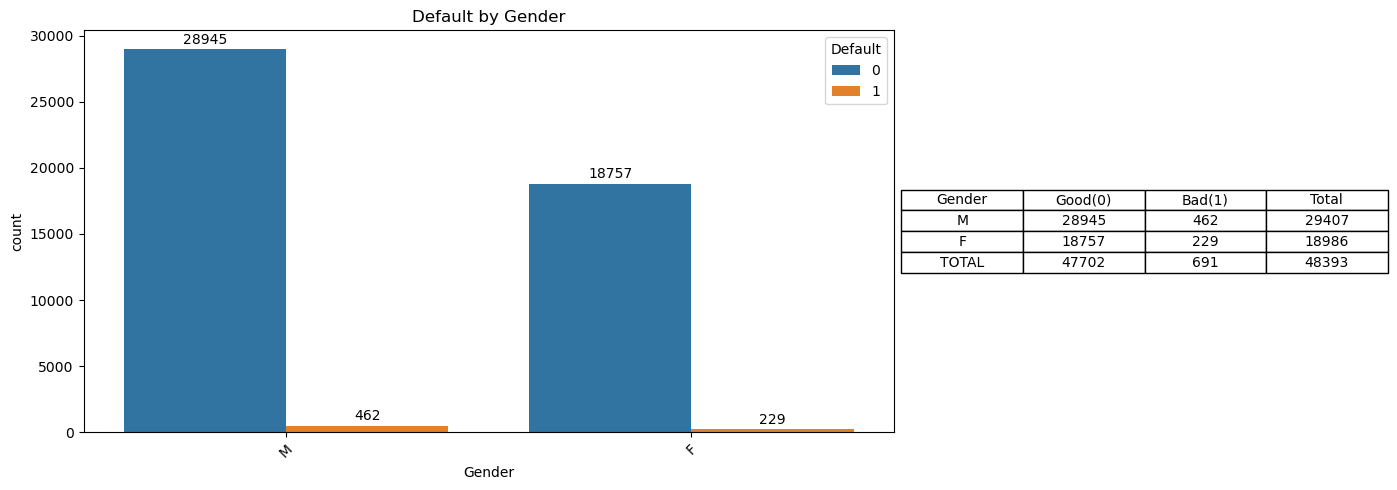

In [505]:
tabla = pd.crosstab(df['Gender'], df['Default'])
tabla['Total'] = tabla.sum(axis=1)

tabla = tabla.sort_values('Total', ascending=False)

tabla.loc['TOTAL'] = tabla.sum()

fig, axes = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios':[2,1]})

# ---- Graph (left)
ax1 = sns.countplot(x='Gender', hue='Default', data=df, order=tabla.index[:-1], ax=axes[0])
ax1.set_title('Default by Gender')
ax1.tick_params(axis='x', rotation=45)

# Counting labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

# ---- Table (right)
axes[1].axis("off")  # hide axes
tabla_plot = axes[1].table(cellText=tabla.reset_index().values,
    colLabels=["Gender", "Good(0)", "Bad(1)", "Total"],
    cellLoc="center",
    loc="center")
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1.2,1.2)

plt.tight_layout()
plt.show()

In [442]:
# Constructing a contingency table
#Frequency table between Gender and Default
contingency = pd.crosstab(df['Gender'], df['Default'])
print(contingency)


Default      0    1
Gender             
F        18757  229
M        28945  462


In [443]:
#Applying Chi² test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("\nTabla esperada:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi2: 10.656839687718321
Degrees of freedom: 1
p-value: 0.0010966461112065433

Tabla esperada:
Default             0           1
Gender                           
F        18714.900337  271.099663
M        28987.099663  419.900337


In [444]:
tab = contingency.copy().reset_index()
tab.rename(columns={0:'Good',1:'Bad'}, inplace=True)
tab['Total'] = tab['Good'] + tab['Bad']

In [445]:
total_good = tab['Good'].sum()
total_bad = tab['Bad'].sum()
eps = 1e-6

In [446]:
tab['%Good'] = tab['Good'] / (total_good + eps)
tab['%Bad'] = tab['Bad'] / (total_bad + eps)

In [447]:
tab['WOE'] = np.log((tab['%Good']+eps) / (tab['%Bad']+eps))
tab['IV_part'] = (tab['%Good'] - tab['%Bad']) * tab['WOE']

iv_total = tab['IV_part'].sum()

print(tab)
print(f"\nIV total Gender = {iv_total:.4f}")

Default Gender   Good  Bad  Total     %Good      %Bad       WOE   IV_part
0            F  18757  229  18986  0.393212  0.331404  0.171011  0.010570
1            M  28945  462  29407  0.606788  0.668596 -0.097001  0.005995

IV total Gender = 0.0166


IV is very low, so age variable is going to be excluded

In [448]:
# Default rate = Bad / Total
contingency = pd.crosstab(df['Gender'], df['Default'])
contingency.columns = ['Good','Bad']
contingency['Total'] = contingency['Good'] + contingency['Bad']
contingency['DefaultRate'] = contingency['Bad'] / contingency['Total']

print(contingency)


         Good  Bad  Total  DefaultRate
Gender                                
F       18757  229  18986     0.012062
M       28945  462  29407     0.015711


In [449]:
rate_f = contingency.loc['F','DefaultRate']
rate_m = contingency.loc['M','DefaultRate']

diff_abs = rate_m - rate_f
diff_rel = diff_abs / rate_f * 100

print(f"Default Rate - F: {rate_f:.4%}")
print(f"Default Rate - M: {rate_m:.4%}")
print(f"Absolute Difference: {diff_abs:.4%}")
print(f"Relativa Difference: {diff_rel:.2f}% más en M")


Default Rate - F: 1.2062%
Default Rate - M: 1.5711%
Absolute Difference: 0.3649%
Relativa Difference: 30.25% más en M


### MARITAL STATUS

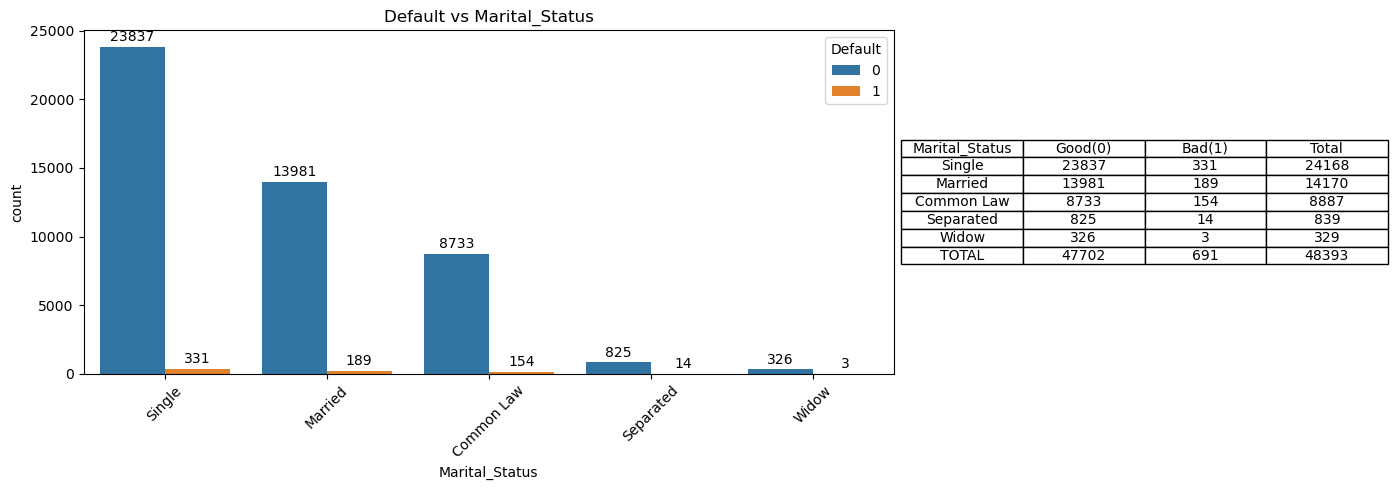

In [450]:
#  Crear tabla resumen
tabla = pd.crosstab(df['Marital_Status'], df['Default'])
tabla['Total'] = tabla.sum(axis=1)

tabla = tabla.sort_values('Total', ascending=False)

tabla.loc['TOTAL'] = tabla.sum()

fig, axes = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios':[2,1]})

# ---- Chart (left)
ax1 = sns.countplot(x='Marital_Status', hue='Default', data=df, order=tabla.index[:-1], ax=axes[0])
ax1.set_title('Default vs Marital_Status')
ax1.tick_params(axis='x', rotation=45)

# Counting labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

# ---- Chart (Right)
axes[1].axis("off")  # Hide exes
tabla_plot = axes[1].table(
    cellText=tabla.reset_index().values,
    colLabels=["Marital_Status", "Good(0)", "Bad(1)", "Total"],
    cellLoc="center",
    loc="center"
)
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1.2,1.2)

plt.tight_layout()
plt.show()

In [144]:
#Prepare the Observed table
contingency = pd.crosstab(df['Marital_Status'].fillna("MISSING"), df['DEFAULT'])
print("Observados (frequency):")
print(contingency)

# Chi²
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi2 = {chi2:.4f}, p-valor = {p:.6f}, dof = {dof}\n")
print("Expcted:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))


Observados (frequency):
DEFAULT             0    1
Marital_Status            
Common Law       8733  154
Married         13981  189
No_Inf              1    0
Separated         825   14
Single          23836  331
Widow             326    3

Chi2 = 8.3291, p-valor = 0.139006, dof = 5

Expcted:
DEFAULT                    0           1
Marital_Status                          
Common Law       8760.103197  126.896803
Married         13967.667638  202.332362
No_Inf              0.985721    0.014279
Separated         827.019982   11.980018
Single          23821.921228  345.078772
Widow             324.302234    4.697766


In [145]:
#Why treat "MISSING" as a category?

#WOE/IV work well if the missing value is not random—it may be related to the default.
#If you omit it, you could be missing a useful signal for discrimination. The same applies if you impute (fill in). It's better to capture it as a separate group.
#It's a simple, clear, and robust strategy from a scorecard perspective.
    
# Construir tabla manual para WOE
tab = contingency.reset_index().rename(columns={0:"Good", 1:"Bad", "Marital_Status":"Category"})
tab["Total"] = tab["Good"] + tab["Bad"]
total_good = tab["Good"].sum()
total_bad  = tab["Bad"].sum()
eps = 1e-6

tab["%Good"] = tab["Good"] / (total_good + eps)
tab["%Bad"]  = tab["Bad"]  / (total_bad  + eps)
tab["WOE"]   = np.log((tab["%Good"] + eps) / (tab["%Bad"] + eps))
tab["IV_part"] = (tab["%Good"] - tab["%Bad"]) * tab["WOE"]

iv_total = tab["IV_part"].sum()

print(tab)
print(f"\nIV total Marital_Status = {iv_total:.4f}")


DEFAULT    Category   Good  Bad  Total     %Good      %Bad       WOE   IV_part
0        Common Law   8733  154   8887  0.183074  0.222865 -0.196676  0.007826
1           Married  13981  189  14170  0.293090  0.273517  0.069119  0.001353
2            No_Inf      1    0      1  0.000021  0.000000  3.089381  0.000065
3         Separated    825   14    839  0.017295  0.020260 -0.158254  0.000469
4            Single  23836  331  24167  0.499686  0.479016  0.042245  0.000873
5             Widow    326    3    329  0.006834  0.004342  0.453612  0.001131

IV total Marital_Status = 0.0117


In [146]:
#PRODUCT

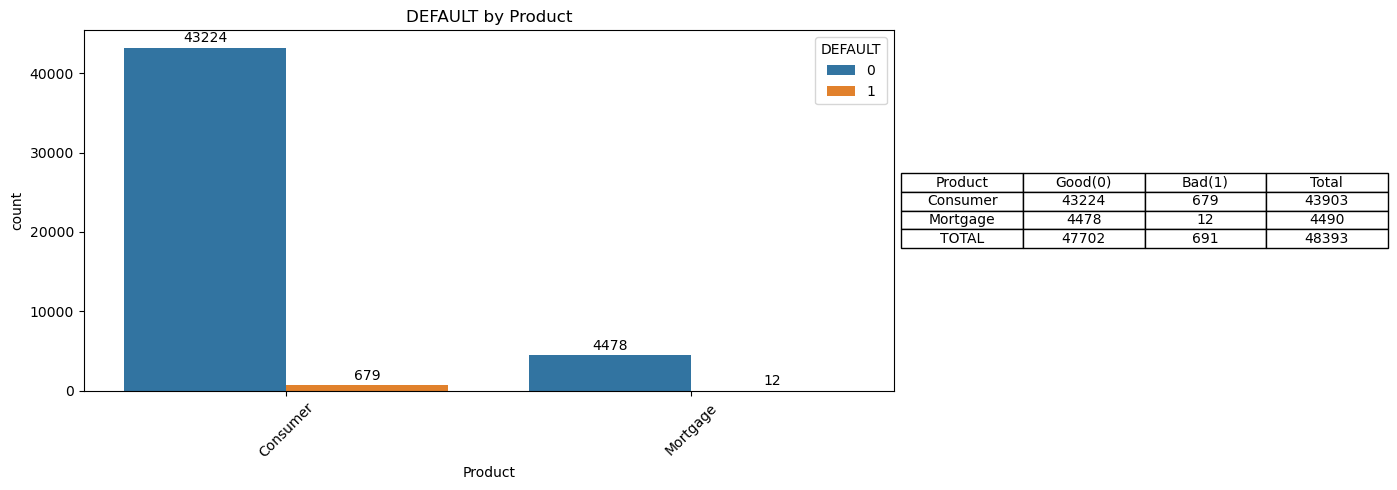

In [147]:
tabla = pd.crosstab(df['Product'], df['DEFAULT'])
tabla['Total'] = tabla.sum(axis=1)

tabla = tabla.sort_values('Total', ascending=False)

tabla.loc['TOTAL'] = tabla.sum()

fig, axes = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios':[2,1]})

ax1 = sns.countplot(x='Product', hue='DEFAULT', data=df, order=tabla.index[:-1], ax=axes[0])
ax1.set_title('DEFAULT by Product')
ax1.tick_params(axis='x', rotation=45)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

axes[1].axis("off")
tabla_plot = axes[1].table(
    cellText=tabla.reset_index().values,
    colLabels=["Product", "Good(0)", "Bad(1)", "Total"],
    cellLoc="center",
    loc="center"
)
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1.2,1.2)

plt.tight_layout()
plt.show()

In [148]:
#1. Chi² test

from scipy.stats import chi2_contingency
import pandas as pd

contingency_prod = pd.crosstab(df['Product'].fillna("MISSING"), df['DEFAULT'])
print("Observed:")
print(contingency_prod)

#  Chi²
chi2, p, dof, expected = chi2_contingency(contingency_prod)
print(f"\nChi2 = {chi2:.4f}, p-valor = {p:.6f}, dof = {dof}\n")

print("Expected:")
print(pd.DataFrame(expected, index=contingency_prod.index, columns=contingency_prod.columns))


Observed:
DEFAULT       0    1
Product             
Consumer  43224  679
Mortgage   4478   12

Chi2 = 46.4622, p-valor = 0.000000, dof = 1

Expected:
DEFAULT              0           1
Product                           
Consumer  43276.112372  626.887628
Mortgage   4425.887628   64.112372


In [149]:
#2. WOE/IV  Product
import numpy as np

tab_prod = contingency_prod.reset_index().rename(columns={0:"Good", 1:"Bad", "Product":"Category"})
tab_prod["Total"] = tab_prod["Good"] + tab_prod["Bad"]

total_good = tab_prod["Good"].sum()
total_bad  = tab_prod["Bad"].sum()
eps = 1e-6

tab_prod["%Good"] = tab_prod["Good"] / (total_good + eps)
tab_prod["%Bad"]  = tab_prod["Bad"]  / (total_bad  + eps)
tab_prod["WOE"]   = np.log((tab_prod["%Good"] + eps) / (tab_prod["%Bad"] + eps))
tab_prod["IV_part"] = (tab_prod["%Good"] - tab_prod["%Bad"]) * tab_prod["WOE"]

iv_total_prod = tab_prod["IV_part"].sum()

print(tab_prod)
print(f"\nIV total Product = {iv_total_prod:.4f}")


DEFAULT  Category   Good  Bad  Total     %Good      %Bad       WOE   IV_part
0        Consumer  43224  679  43903  0.906126  0.982634 -0.081059  0.006202
1        Mortgage   4478   12   4490  0.093874  0.017366  1.687389  0.129099

IV total Product = 0.1353


### Income_Level per Month

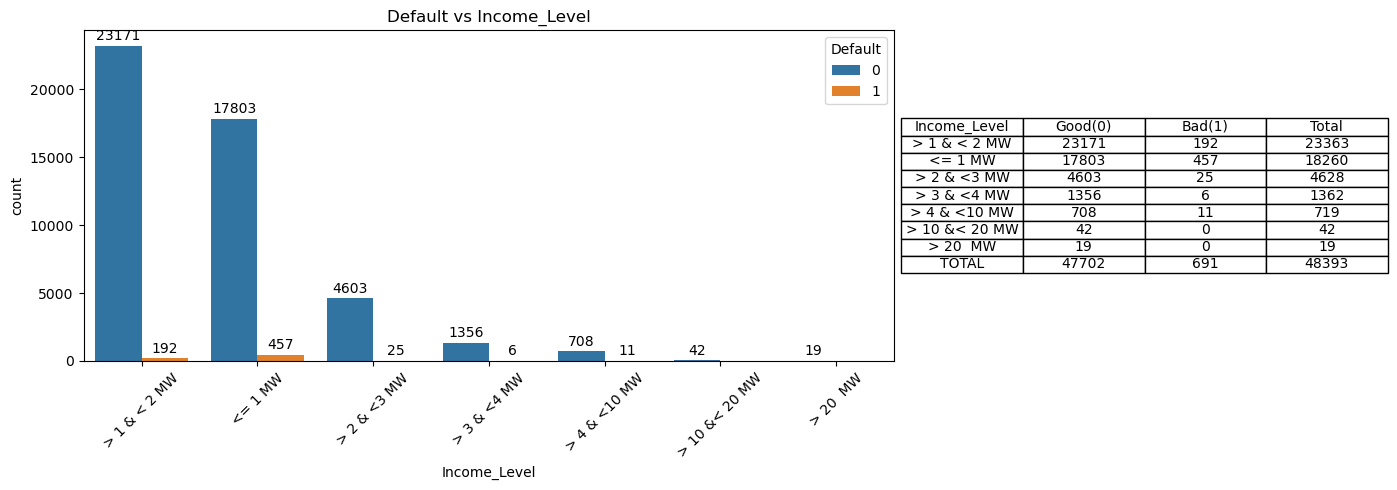

In [249]:
tabla = pd.crosstab(df['Income_Level'], df['Default'])
tabla['Total'] = tabla.sum(axis=1)

tabla = tabla.sort_values('Total', ascending=False)
tabla.loc['TOTAL'] = tabla.sum()

fig, axes = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios':[2,1]})

ax1 = sns.countplot(x='Income_Level', hue='Default', data=df, order=tabla.index[:-1], ax=axes[0])
ax1.set_title('Default vs Income_Level')
ax1.tick_params(axis='x', rotation=45)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

axes[1].axis("off")  
tabla_plot = axes[1].table(
    cellText=tabla.reset_index().values,
    colLabels=["Income_Level", "Good(0)", "Bad(1)", "Total"],
    cellLoc="center",
    loc="center"
)
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1.2,1.2)

plt.tight_layout()
plt.show()

In [250]:
#1. Chi²  Income_Level
 
contingency_prod = pd.crosstab(df['Income_Level'].fillna("MISSING"), df['Default'])
print("Observed:")
print(contingency_prod)

#  Chi²
chi2, p, dof, expected = chi2_contingency(contingency_prod)
print(f"\nChi2 = {chi2:.4f}, p-valor = {p:.6f}, dof = {dof}\n")

print("Expected:")
print(pd.DataFrame(expected, index=contingency_prod.index, columns=contingency_prod.columns))


Observed:
Default            0    1
Income_Level             
<= 1 MW        17803  457
> 1 & < 2 MW   23171  192
> 10 &< 20 MW     42    0
> 2 & <3 MW     4603   25
> 20  MW          19    0
> 3 & <4 MW     1356    6
> 4 & <10 MW     708   11

Chi2 = 247.1343, p-valor = 0.000000, dof = 6

Expected:
Default                   0           1
Income_Level                           
<= 1 MW        17999.266836  260.733164
> 1 & < 2 MW   23029.401484  333.598516
> 10 &< 20 MW     41.400285    0.599715
> 2 & <3 MW     4561.917137   66.082863
> 20  MW          18.728700    0.271300
> 3 & <4 MW     1342.552105   19.447895
> 4 & <10 MW     708.733453   10.266547


In [251]:
# WOE/IV  Income_Level
tab_prod = contingency_prod.reset_index().rename(columns={0:"Good", 1:"Bad", "Income_Level":"Category"})
tab_prod["Total"] = tab_prod["Good"] + tab_prod["Bad"]

total_good = tab_prod["Good"].sum()
total_bad  = tab_prod["Bad"].sum()
eps = 1e-6

tab_prod["%Good"] = tab_prod["Good"] / (total_good + eps)
tab_prod["%Bad"]  = tab_prod["Bad"]  / (total_bad  + eps)
tab_prod["WOE"]   = np.log((tab_prod["%Good"] + eps) / (tab_prod["%Bad"] + eps))
tab_prod["IV_part"] = (tab_prod["%Good"] - tab_prod["%Bad"]) * tab_prod["WOE"]

iv_total_prod = tab_prod["IV_part"].sum()

print(tab_prod)
print(f"\nIV total Product = {iv_total_prod:.4f}")


Default       Category   Good  Bad  Total     %Good      %Bad       WOE  \
0              <= 1 MW  17803  457  18260  0.373213  0.661360 -0.572149   
1         > 1 & < 2 MW  23171  192  23363  0.485745  0.277858  0.558571   
2        > 10 &< 20 MW     42    0     42  0.000880  0.000000  6.781587   
3          > 2 & <3 MW   4603   25   4628  0.096495  0.036179  0.980982   
4             > 20  MW     19    0     19  0.000398  0.000000  5.989728   
5          > 3 & <4 MW   1356    6   1362  0.028426  0.008683  1.185866   
6         > 4 & <10 MW    708   11    719  0.014842  0.015919 -0.070035   

Default   IV_part  
0        0.164863  
1        0.116119  
2        0.005971  
3        0.059168  
4        0.002386  
5        0.023413  
6        0.000075  

IV total Product = 0.3720


### Getting ready the variables for the logistic Regression

In [451]:
def create_woe_map(df, var, target='Default'):
    # 1) Normalizing target  0/1 
    tmp = df[[var, target]].copy()
    tmp[target] = pd.to_numeric(tmp[target], errors='coerce').fillna(0).astype(int)
    tmp[var] = tmp[var].fillna("MISSING")
    
    # 2) 
    tab = pd.crosstab(tmp[var], tmp[target])

    try:
        tab.columns = tab.columns.astype(int)
    except:
        pass

    tab = tab.reindex(columns=[0, 1], fill_value=0)
    tab = tab.rename(columns={0: 'Good', 1: 'Bad'})
    
    # 3)  WOE
    total_good = tab['Good'].sum()
    total_bad  = tab['Bad'].sum()
    eps = 1e-6
    
    tab['%Good'] = tab['Good'] / (total_good + eps)
    tab['%Bad']  = tab['Bad']  / (total_bad  + eps)
    tab['WOE']   = np.log((tab['%Good'] + eps) / (tab['%Bad'] + eps))
    
    # 4) {category: woe}
    return tab['WOE'].to_dict()


In [452]:
#Generating columns for WOE for each variable
# Income_LeveL
df['Income_Level'] = df['Income_Level'].astype(str).fillna("MISSING")
income_woe_map = create_woe_map(df, 'Income_Level', target='Default')
df['Income_Level_WOE'] = df['Income_Level'].map(income_woe_map)

# Job_Tenure_Bin
df['Job_Tenure'] = df['Job_Tenure'].astype(str).fillna("MISSING")
bonding_woe_map = create_woe_map(df, 'Job_Tenure', target='Default')
df['Job_Tenure_WOE'] = df['Job_Tenure'].map(bonding_woe_map)

# Product
df['Product'] = df['Product'].astype(str).fillna("MISSING")
product_woe_map = create_woe_map(df, 'Product', target='Default')
df['Product_WOE'] = df['Product'].map(product_woe_map)

In [453]:
# Verifying the transformation if the selected variables adding the WOE to each level
print(df[['Income_Level','Income_Level_WOE']].head())
print(df[['Job_Tenure','Job_Tenure_WOE']].head())
print(df[['Product','Product_WOE']].head())

    Income_Level  Income_Level_WOE
0        <= 1 MW         -0.572149
1   > 1 & < 2 MW          0.558571
2  > 10 &< 20 MW          6.781587
3   > 1 & < 2 MW          0.558571
4   > 1 & < 2 MW          0.558571
  Job_Tenure  Job_Tenure_WOE
0        103       -1.158310
1         37        0.765904
2         15        0.480280
3          0       -0.965403
4          0       -0.965403
    Product  Product_WOE
0  Consumer    -0.081059
1  Consumer    -0.081059
2  Consumer    -0.081059
3  Consumer    -0.081059
4  Consumer    -0.081059


### Logistic Regression with WOE (traditional)

In [487]:
#Splitting the data set in training and test
features = ['Income_Level_WOE', 'Job_Tenure_WOE', 'Product_WOE']

X_full = df[features].copy()
y_full = df['Default'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.30, random_state=42, stratify=y_full
)

# Agregar constante a cada split (statsmodels requiere intercepto explícito)
X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm  = sm.add_constant(X_test,  has_constant='add')

In [488]:
#Training set
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

print(result.summary())

odds_ratios = np.exp(result.params)
print("\nOdds Ratios (exp(coef)):")
print(odds_ratios)

# Probabilidades (PD_model) en Train y Test
train_df = X_train.copy()
test_df  = X_test.copy()

train_df['PD_model'] = result.predict(X_train_sm)
test_df['PD_model']  = result.predict(X_test_sm)

print("\nHEAD (Train) con PD_model:")
print(train_df[['Income_Level_WOE','Job_Tenure_WOE','Product_WOE','PD_model']].head())

print("\nHEAD (Test) con PD_model:")
print(test_df[['Income_Level_WOE','Job_Tenure_WOE','Product_WOE','PD_model']].head())

# Tabla de coeficientes (manteniendo tus encabezados en español)
coef_table = pd.DataFrame({
    'Variable': ['Intercepto'] + features,
    'Coeficiente': result.params.values,
    'StdErr': result.bse.values,
    'z': result.tvalues.values,
    'p_value': result.pvalues.values,
    'OddsRatio': np.exp(result.params.values)
})
coef_table


Optimization terminated successfully.
         Current function value: 0.068520
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                33875
Model:                          Logit   Df Residuals:                    33871
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.08500
Time:                        15:53:54   Log-Likelihood:                -2321.1
converged:                       True   LL-Null:                       -2536.7
Covariance Type:            nonrobust   LLR p-value:                 3.759e-93
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2432      0.055    -77.648      0.000      -4.350      -4.136
Income_Lev

,Variable,Coeficiente,StdErr,z,p_value,OddsRatio
0,Intercepto,-4.243219,0.054647,-77.647702,0.000000e+00,0.014361
1,Income_Level_WOE,-0.832968,0.081380,-10.235536,1.374314e-24,0.434757
2,Job_Tenure_WOE,-0.975078,0.087319,-11.166817,5.926685e-29,0.377163
3,Product_WOE,-0.660120,0.173374,-3.807491,1.403837e-04,0.516789


[TRAIN] AUC = 0.7548
[TRAIN] KS  = 0.3944
[TRAIN] Gini= 0.5096


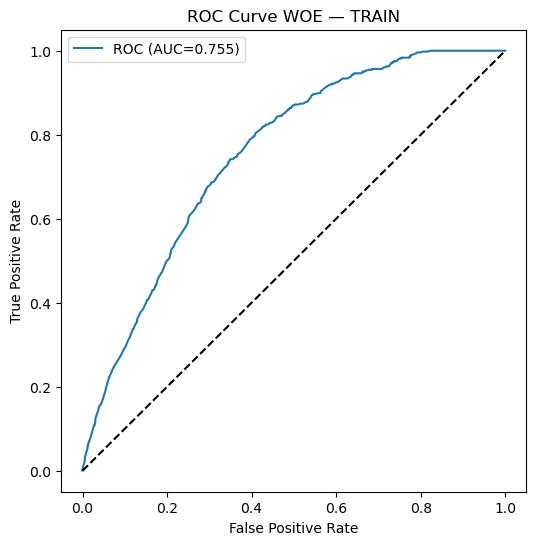

In [489]:
#Metrics
def ks_from_scores(y_true, y_score):
    fpr, tpr, thr = roc_curve(y_true, y_score)
    return np.max(tpr - fpr), (fpr, tpr, thr)

# Train
auc_tr = roc_auc_score(y_train, train_df['PD_model'])
ks_tr, (fpr_tr, tpr_tr, thr_tr) = ks_from_scores(y_train, train_df['PD_model'])
gini_tr = 2 * auc_tr - 1

print(f"[TRAIN] AUC = {auc_tr:.4f}")
print(f"[TRAIN] KS  = {ks_tr:.4f}")
print(f"[TRAIN] Gini= {gini_tr:.4f}")

plt.figure(figsize=(6,6))
plt.plot(fpr_tr, tpr_tr, label=f'ROC (AUC={auc_tr:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve WOE — TRAIN")
plt.legend()
plt.show()


[TEST] AUC = 0.7616
[TEST] KS  = 0.4308
[TEST] Gini= 0.5232


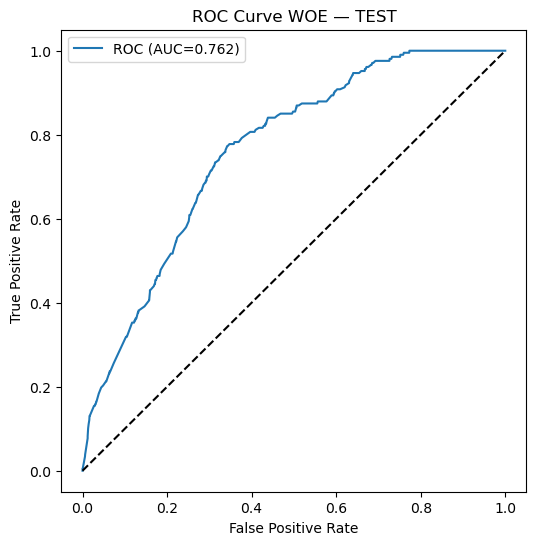

In [490]:
#Test
auc_te = roc_auc_score(y_test, test_df['PD_model'])
ks_te, (fpr_te, tpr_te, thr_te) = ks_from_scores(y_test, test_df['PD_model'])
gini_te = 2 * auc_te - 1

print(f"[TEST] AUC = {auc_te:.4f}")
print(f"[TEST] KS  = {ks_te:.4f}")
print(f"[TEST] Gini= {gini_te:.4f}")

plt.figure(figsize=(6,6))
plt.plot(fpr_te, tpr_te, label=f'ROC (AUC={auc_te:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve WOE — TEST")
plt.legend()
plt.show()


In [491]:
#Metrics
def ks_from_scores(y_true, y_score):
    fpr, tpr, thr = roc_curve(y_true, y_score)
    ks_val = np.max(tpr - fpr)
    thr_ks = thr[int(np.argmax(tpr - fpr))]
    return ks_val, thr_ks, (fpr, tpr, thr)

def metrics_at_threshold(y_true, y_score, thr=0.5):
    """Devuelve todas las métricas pedidas a un umbral dado."""
    y_pred = (y_score >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    # Probabilistic metrics/curve
    auc = roc_auc_score(y_true, y_score)
    fpr, tpr, _ = roc_curve(y_true, y_score)
    ks = np.max(tpr - fpr)
    gini = 2*auc - 1
    ll = log_loss(y_true, np.clip(y_score, 1e-12, 1-1e-12))

    # Point classification metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        "AUC": auc, "KS": ks, "Gini": gini, "LogLoss": ll,
        "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1,
        "Specificity": specificity, "Threshold": thr,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    }

def plot_confusion(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure()
    disp.plot(values_format="d")
    plt.title(title)
    plt.show()

Métricas @ umbral 0.5


,Split,AUC,KS,Gini,LogLoss,Accuracy,Precision,Recall,F1,Specificity,Threshold
0,Train,0.754823,0.394387,0.509647,0.068520,0.985712,0.0,0.0,0.0,1.0,0.5
1,Test,0.761595,0.430763,0.523190,0.067656,0.985742,0.0,0.0,0.0,1.0,0.5


<Figure size 640x480 with 0 Axes>

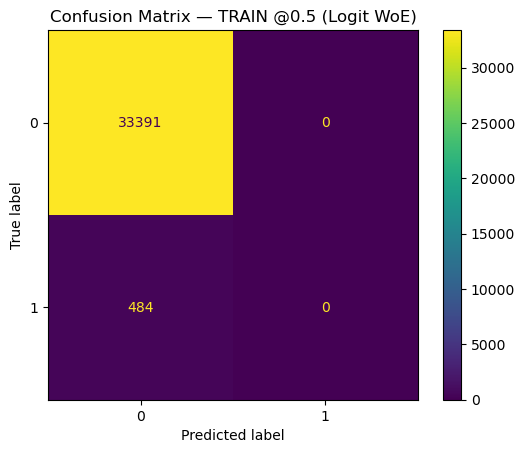

<Figure size 640x480 with 0 Axes>

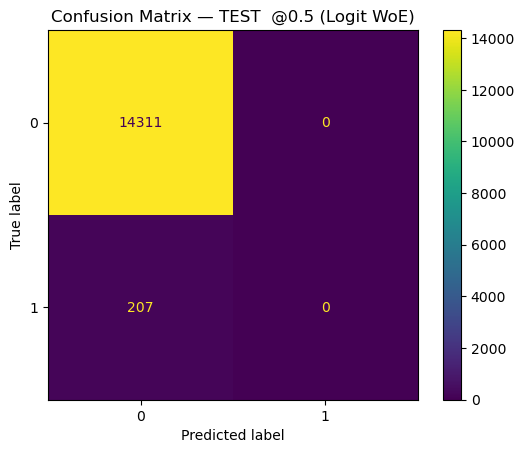

In [492]:
# 1) Threshold fixed = 0.5 as a reference to check the decision matrix
thr_fixed = 0.5

m_tr_05 = metrics_at_threshold(y_train, train_df['PD_model'].values, thr_fixed)
m_te_05 = metrics_at_threshold(y_test,  test_df['PD_model'].values,  thr_fixed)

df_05 = pd.DataFrame([
    {"Split":"Train", **{k:v for k,v in m_tr_05.items() if k not in ["TN","FP","FN","TP"]}},
    {"Split":"Test",  **{k:v for k,v in m_te_05.items() if k not in ["TN","FP","FN","TP"]}},
])

print("Métricas @ umbral 0.5")
display(df_05)

# Confusion Matrix @0.5
cm_tr_05 = np.array([[m_tr_05["TN"], m_tr_05["FP"]],
                     [m_tr_05["FN"], m_tr_05["TP"]]], dtype=int)
cm_te_05 = np.array([[m_te_05["TN"], m_te_05["FP"]],
                     [m_te_05["FN"], m_te_05["TP"]]], dtype=int)

plot_confusion(cm_tr_05, "Confusion Matrix — TRAIN @0.5 (Logit WoE)")
plot_confusion(cm_te_05, "Confusion Matrix — TEST  @0.5 (Logit WoE)")



Umbrales KS -> Train: 0.0123 | Test: 0.0150
Métricas @ umbral KS (cada split con su umbral):


,Split,AUC,KS,Gini,LogLoss,Accuracy,Precision,Recall,F1,Specificity,Threshold
0,Train,0.754823,0.394387,0.509647,0.068520,0.593712,0.027673,0.803719,0.053504,0.590668,0.012295
1,Test,0.761595,0.430763,0.523190,0.067656,0.659457,0.031639,0.772947,0.060790,0.657816,0.015047


<Figure size 640x480 with 0 Axes>

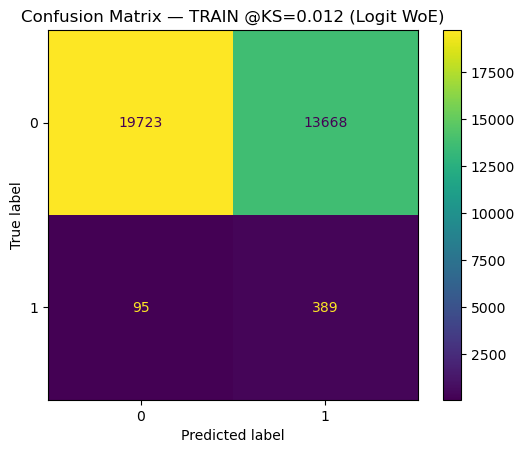

<Figure size 640x480 with 0 Axes>

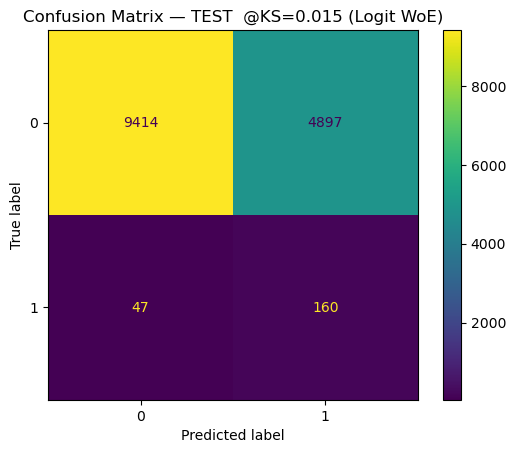

In [493]:
# 2) KS Threshold (por split)
ks_tr, thr_ks_tr, _ = ks_from_scores(y_train, train_df['PD_model'].values)
ks_te, thr_ks_te, _ = ks_from_scores(y_test,  test_df['PD_model'].values)

m_tr_ks = metrics_at_threshold(y_train, train_df['PD_model'].values, thr_ks_tr)
m_te_ks = metrics_at_threshold(y_test,  test_df['PD_model'].values, thr_ks_te)

df_ks = pd.DataFrame([
    {"Split":"Train", **{k:v for k,v in m_tr_ks.items() if k not in ["TN","FP","FN","TP"]}},
    {"Split":"Test",  **{k:v for k,v in m_te_ks.items() if k not in ["TN","FP","FN","TP"]}},
])

print(f"\nUmbrales KS -> Train: {thr_ks_tr:.4f} | Test: {thr_ks_te:.4f}")
print("Métricas @ umbral KS (cada split con su umbral):")
display(df_ks)

# Confusion Matrix @KS
cm_tr_ks = np.array([[m_tr_ks["TN"], m_tr_ks["FP"]],
                     [m_tr_ks["FN"], m_tr_ks["TP"]]], dtype=int)
cm_te_ks = np.array([[m_te_ks["TN"], m_te_ks["FP"]],
                     [m_te_ks["FN"], m_te_ks["TP"]]], dtype=int)

plot_confusion(cm_tr_ks, f"Confusion Matrix — TRAIN @KS={thr_ks_tr:.3f} (Logit WoE)")
plot_confusion(cm_te_ks, f"Confusion Matrix — TEST  @KS={thr_ks_te:.3f} (Logit WoE)")


In [498]:
#Deciles table
def decile_table_pd_en(y_true, y_prob, bins=10):
    df = pd.DataFrame({
        "y": np.asarray(y_true).astype(int),
        "p": np.asarray(y_prob).astype(float)
    }).sort_values("p", ascending=False).reset_index(drop=True)

    n = len(df)
    bucket = np.ceil((np.arange(1, n+1)) / (n / bins)).astype(int)
    bucket[bucket > bins] = bins
    df["Decile"] = bucket  # 1..bins

    out = (df.groupby("Decile", as_index=False)
             .agg(Total=("y","size"),
                  Bads=("y","sum"),
                  Avg_PD=("p","mean")))
    out["Goods"] = out["Total"] - out["Bads"]
    out["Default_Rate"] = out["Bads"] / out["Total"]
    out = out[["Decile","Total","Bads","Goods","Avg_PD","Default_Rate"]].sort_values("Decile")

    # Optional rounding
    out["Avg_PD"] = out["Avg_PD"].round(6)
    out["Default_Rate"] = out["Default_Rate"].round(6)
    return out

decile_tbl = decile_table_pd_en(y_test, test_df["PD_model"], bins=10)

cum_bad = decile_tbl["Bads"].cumsum()
total_bad = decile_tbl["Bads"].sum()

decile_tbl["Pct_Bads_Captured"] = (cum_bad / total_bad).round(4)          # 0..1
decile_tbl["Pct_Bads_Captured_str"] = (decile_tbl["Pct_Bads_Captured"]*100).round(1).astype(str) + "%"

display(decile_tbl)

,Decile,Total,Bads,Goods,Avg_PD,Default_Rate,Pct_Bads_Captured,Pct_Bads_Captured_str
0,1,1451,63,1388,0.045027,0.043418,0.3043,30.4%
1,2,1452,40,1412,0.028060,0.027548,0.4976,49.8%
2,3,1452,42,1410,0.021818,0.028926,0.7005,70.0%
3,4,1452,22,1430,0.014953,0.015152,0.8068,80.7%
4,5,1452,9,1443,0.011514,0.006198,0.8502,85.0%
5,6,1451,10,1441,0.009308,0.006892,0.8986,89.9%
6,7,1452,16,1436,0.007569,0.011019,0.9758,97.6%
7,8,1452,5,1447,0.004812,0.003444,1.0000,100.0%
8,9,1452,0,1452,0.001154,0.000000,1.0000,100.0%
9,10,1452,0,1452,0.000008,0.000000,1.0000,100.0%


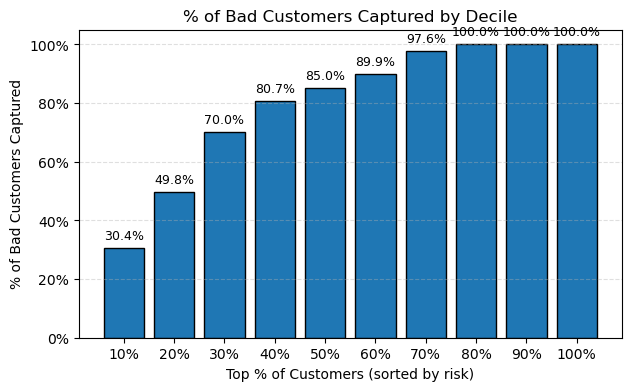

In [495]:
# ===== Bar chart: % of bad customers captured by top-x% (cumulative) =====
cum_bad = decile_tbl["Bads"].cumsum()
pct_bad_captured = (cum_bad / decile_tbl["Bads"].sum()).values  # 0..1
x_labels = [f"{i*10}%" for i in range(1, 11)]

plt.figure(figsize=(7,4))
plt.bar(x_labels, pct_bad_captured, edgecolor="black")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, 1.05)
plt.ylabel("% of Bad Customers Captured")
plt.xlabel("Top % of Customers (sorted by risk)")
plt.title("% of Bad Customers Captured by Decile")
# annotate bars
for i, v in enumerate(pct_bad_captured):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha="center", va="bottom", fontsize=9)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

# Machine Learning process

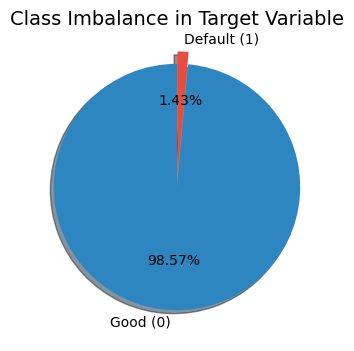

In [337]:
import matplotlib.pyplot as plt

counts = df['Default'].value_counts().sort_index()

labels = ['Good (0)', 'Default (1)']
colors = ['#2E86C1', '#E74C3C']

plt.figure(figsize=(4,4))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90,
        colors=colors, explode=(0, 0.1), shadow=True)

plt.title('Class Imbalance in Target Variable', fontsize=14)
plt.show()


## 1 - Logistic Regression (ML)

In [353]:
print(df.columns.tolist())

['Genre', 'Product', 'Income_Level', 'Marital_Status', 'Job_Tenure', 'Age', 'Default', 'log_Age', 'log_Job_Tenure', 'Job_Tenure_Bin', 'Age_Bin', 'Age_Bin_4', 'Income_Level_WOE', 'Job_Tenure_WOE', 'Product_WOE', 'PD_model']


In [362]:
# Configuring features/target 
FEATURES = ['Income_Level', 'Job_Tenure', 'Product','Gender','Marital_Status','Age']
TARGET   = 'Default'

X = df[FEATURES].copy()
y = df[TARGET].astype(int).copy()

# Train/test split (holdout, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

# Categorical vs numeric
cat_features = ['Income_Level', 'Product']
num_features = ['Job_Tenure']

preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
        ('num', 'passthrough', num_features),
    ],
    remainder='drop'
)

# --- Metrics helpers ---
def eval_metrics(y_true, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks  = np.max(tpr - fpr)
    gini = 2*auc - 1
    return auc, ks, gini, fpr, tpr, thr

def decile_table(y_true, y_prob):
    tmp = pd.DataFrame({'y': y_true, 'p': y_prob}).sort_values('p', ascending=False).reset_index(drop=True)
    n = len(tmp); total_bad = tmp['y'].sum()
    cuts = [int(round(p*n)) for p in np.linspace(0.1, 1.0, 10)]
    rows = []
    for i, c in enumerate(cuts, start=1):
        malos = tmp.loc[:c-1, 'y'].sum()
        rows.append({'Top %': f'{i*10}%', '% Bad Captured (Accumulated)': malos/total_bad})
    return pd.DataFrame(rows)


In [363]:
#Train & score (class-weighted for imbalance)
logit_pipe = Pipeline(steps=[
    ('prep', preproc),
    ('clf', LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced', ))
])

logit_pipe.fit(X_train, y_train)
pd_test = logit_pipe.predict_proba(X_test)[:, 1]

In [364]:
pd_train = logit_pipe.predict_proba(X_train)[:, 1]
pd_test  = logit_pipe.predict_proba(X_test)[:, 1]

# Helper de métricas (si no lo tienes cargado)
def eval_metrics(y_true, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks = np.max(tpr - fpr)
    gini = 2*auc - 1
    return auc, ks, gini, fpr, tpr, thr

auc_tr, ks_tr, gini_tr, fpr_tr, tpr_tr, thr_tr = eval_metrics(y_train, pd_train)
auc_te, ks_te, gini_te, fpr_te, tpr_te, thr_te = eval_metrics(y_test,  pd_test)

print("=== Discriminación (Train vs Test) ===")
print(f"AUC   Train={auc_tr:.4f} | Test={auc_te:.4f}")
print(f"KS    Train={ks_tr:.4f}")
print(f"Gini  Train={gini_tr:.4f}")

=== Discriminación (Train vs Test) ===
AUC   Train=0.6851 | Test=0.6995
KS    Train=0.3204
Gini  Train=0.3703


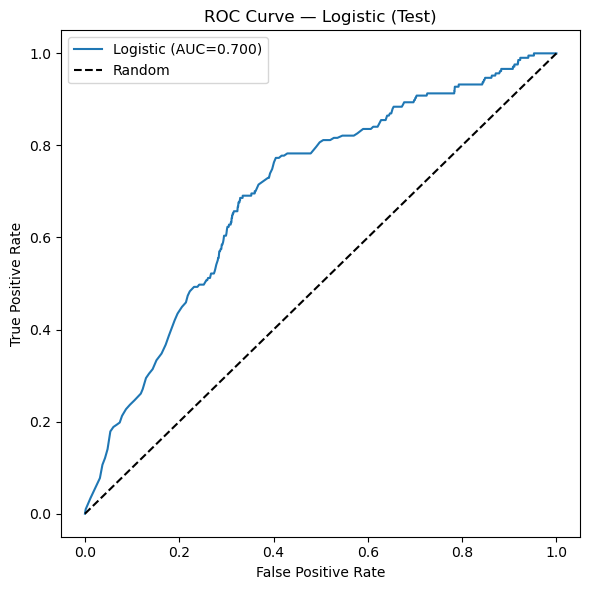

In [365]:
# ROC CURVE (TEST)

plt.figure(figsize=(6,6))
plt.plot(fpr_te, tpr_te, label=f'Logistic (AUC={auc_te:.3f})')
plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic (Test)")
plt.legend(); plt.tight_layout(); plt.show()


Thresholds → 0.50 (estándar) | 0.4204 (Optimum KS)

=== Confusion Matrix — Test / 0.50 (thr=0.5000) ===
[[9195 5116]
 [  63  144]]
TN=9195  FP=5116  FN=63  TP=144
Accuracy=0.6433 | Precision=0.0274 | Recall=0.6957 | F1=0.0527 | Specificity=0.6425


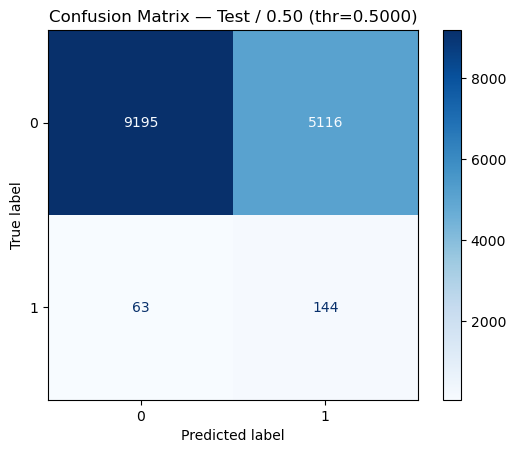


=== Confusion Matrix — Test / KS-óptimo (thr=0.4204) ===
[[8518 5793]
 [  47  160]]
TN=8518  FP=5793  FN=47  TP=160
Accuracy=0.5977 | Precision=0.0269 | Recall=0.7729 | F1=0.0519 | Specificity=0.5952


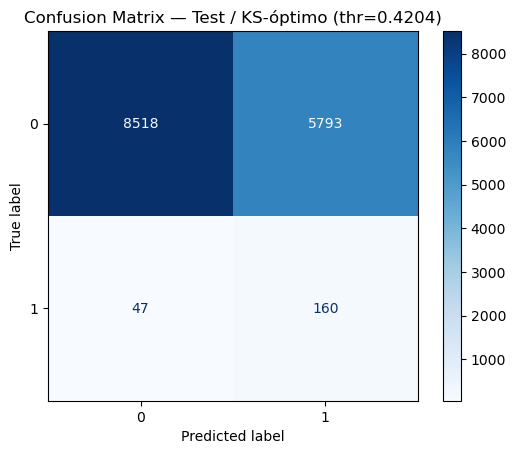

In [366]:
# Standard Threshold 0.50 if it is > 0.5 it is default
thr_050 = 0.50

# Optimum threshold -  KS 
ix_ks = np.argmax(tpr_te - fpr_te)
thr_ks = thr_te[ix_ks]
print(f"\nThresholds → 0.50 (estándar) | {thr_ks:.4f} (Optimum KS)")

#Confusion matrix
def confusion_and_scores(y_true, y_prob, thr, label):
    y_pred = (y_prob >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    # Métricas
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)      # TPR (sensibilidad)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0.0           # Especificidad
    print(f"\n=== Confusion Matrix — {label} (thr={thr:.4f}) ===")
    print(cm)
    print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")
    print(f"Accuracy={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f} | Specificity={spec:.4f}")
    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix — {label} (thr={thr:.4f})")
    plt.show()

# Evaluating in TEST with both thresholds
confusion_and_scores(y_test, pd_test, thr_050, "Test / 0.50")
confusion_and_scores(y_test, pd_test, thr_ks,  "Test / KS-óptimo")


AUC  Train/Test: 0.6851 / 0.6995
KS   Train/Test: 0.3204 / 0.3682
Gini Train/Test: 0.3703 / 0.3990


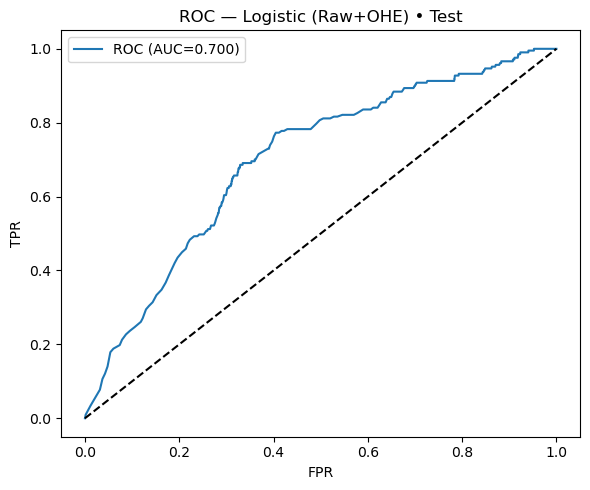

Thresholds → 0.50 | KS-óptimo=0.4204

Confusion Matrix — Test (0.50) (thr=0.5000)
[[9195 5116]
 [  63  144]]
Accuracy=0.6433 | Precision=0.0274 | Recall=0.6957 | F1=0.0527 | Specificity=0.6425


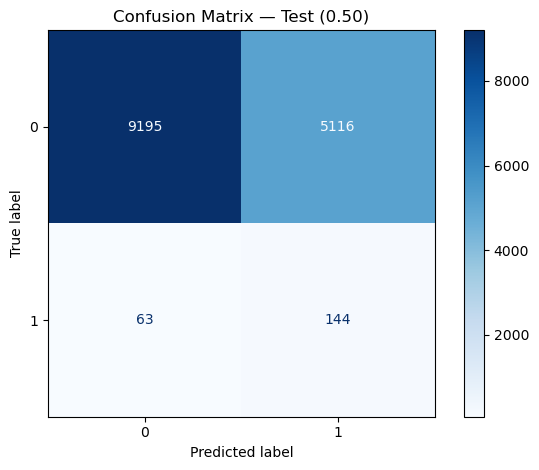


Confusion Matrix — Test (KS-optimal) (thr=0.4204)
[[8518 5793]
 [  47  160]]
Accuracy=0.5977 | Precision=0.0269 | Recall=0.7729 | F1=0.0519 | Specificity=0.5952


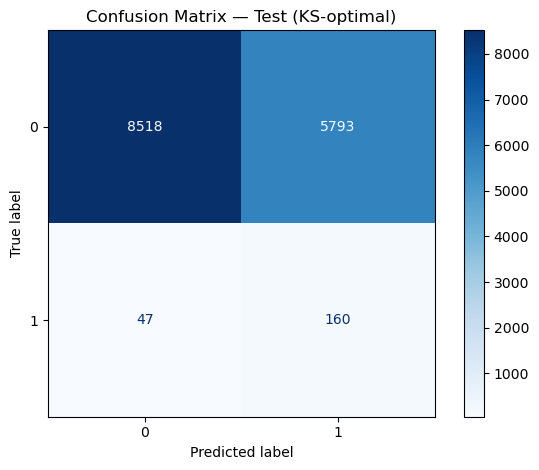

In [369]:
#Train vs Test (AUC, KS, Gini + Confusión)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Pipeline for training
logit_pipe.fit(X_tr, y_tr)

# Probabilities
pd_tr = logit_pipe.predict_proba(X_tr)[:,1]
pd_te = logit_pipe.predict_proba(X_te)[:,1]

# KPIs
def eval_metrics(y_true, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    ks = np.max(tpr - fpr)
    gini = 2*auc - 1
    return auc, ks, gini, fpr, tpr, thr

auc_tr, ks_tr, gini_tr, fpr_tr, tpr_tr, thr_tr = eval_metrics(y_tr, pd_tr)
auc_te, ks_te, gini_te, fpr_te, tpr_te, thr_te = eval_metrics(y_te, pd_te)

print(f"AUC  Train/Test: {auc_tr:.4f} / {auc_te:.4f}")
print(f"KS   Train/Test: {ks_tr:.4f} / {ks_te:.4f}")
print(f"Gini Train/Test: {gini_tr:.4f} / {gini_te:.4f}")

#  ROC Graph (Test)
plt.figure(figsize=(6,5))
plt.plot(fpr_te, tpr_te, label=f'ROC (AUC={auc_te:.3f})')
plt.plot([0,1],[0,1],'k--'); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC — Logistic (Raw+OHE) • Test"); plt.legend(); plt.tight_layout(); plt.show()

# Thresholds: 0.50 y óptimo por KS
thr_050 = 0.50
thr_ks  = thr_te[np.argmax(tpr_te - fpr_te)]
print(f"Thresholds → 0.50 | KS-óptimo={thr_ks:.4f}")

def confusion_and_scores(y_true, y_prob, thr, title):
    y_pred = (y_prob >= thr).astype(int)
    cm = confusion_matrix(y_true, y_pred); tn, fp, fn, tp = cm.ravel()
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)  # TPR
    f1   = f1_score(y_true, y_pred, zero_division=0)
    spec = tn/(tn+fp) if (tn+fp)>0 else 0.0
    print(f"\n{title} (thr={thr:.4f})")
    print(cm)
    print(f"Accuracy={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f} | Specificity={spec:.4f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap='Blues', values_format='d'); plt.title(title); plt.tight_layout(); plt.show()

confusion_and_scores(y_te, pd_te, thr_050, "Confusion Matrix — Test (0.50)")
confusion_and_scores(y_te, pd_te, thr_ks,  "Confusion Matrix — Test (KS-optimal)")

In [372]:
# Metrics

def eval_metrics(y_true, y_prob):
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    auc  = roc_auc_score(y_true, y_prob)
    ks   = np.max(tpr - fpr)
    gini = 2*auc - 1
    return {'AUC': auc, 'KS': ks, 'Gini': gini, 'fpr': fpr, 'tpr': tpr, 'thr': thr}

def decile_table(y_true, y_prob):
    tmp = pd.DataFrame({'y': y_true, 'p': y_prob}).sort_values('p', ascending=False).reset_index(drop=True)
    n = len(tmp); total_bad = tmp['y'].sum()
    cuts = [int(round(q*n)) for q in np.linspace(0.1, 1.0, 10)]
    rows = []
    prev = 0
    acc = 0
    for i,c in enumerate(cuts, start=1):
        malos_acum = tmp.loc[:c-1, 'y'].sum()
        inc = malos_acum - acc
        acc = malos_acum
        rows.append({
            'Top %': f'{i*10}%',
            '% Malos (Incremental)': inc/total_bad if total_bad>0 else 0.0,
            '% Malos (Acumulado)':  malos_acum/total_bad if total_bad>0 else 0.0
        })
    return pd.DataFrame(rows)

In [378]:
# ---------------------------
# Raw data
# ---------------------------
X_raw = df[['Income_Level', 'Job_Tenure', 'Product','Gender','Marital_Status','Age']].copy()
y     = df['Default'].astype(int).copy()

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.30, stratify=y, random_state=42)

#  WOE data
X_woe   = df[['Income_Level_WOE','Job_Tenure_WOE','Product_WOE']].copy()
X_trw, X_tew = X_woe.loc[X_train_raw.index], X_woe.loc[X_test_raw.index] 

In [377]:
# Processing: OHE categorical, passthrough numeric

cat_features = ['Income_Level','Product','Gender','Marital_Status']
num_features = ['Job_Tenure','Age']

# Checking OneHotEncoder version
import sklearn
from packaging import version
if version.parse(sklearn.__version__) >= version.parse("1.4"):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preproc = ColumnTransformer([ ('cat', ohe, cat_features),('num', 'passthrough', num_features),])

pipe = Pipeline([('prep', preproc), ('clf', LogisticRegression(max_iter=2000))])

# Grid for solver/penalty 
param_grid = [
    {'clf__solver':['lbfgs'],    'clf__penalty':['l2'],    'clf__C':[0.01,0.1,1,10], 'clf__class_weight':[None,'balanced']},
    {'clf__solver':['liblinear'],'clf__penalty':['l1','l2'],     'clf__C':[0.01,0.1,1,10], 'clf__class_weight':[None,'balanced']},
     {'clf__solver': ['saga'],'clf__penalty': ['elasticnet'], 'clf__l1_ratio': [0.1, 0.5, 0.9],'clf__C': [0.01, 0.1, 1, 10],'clf__class_weight': [None, 'balanced']},
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(   estimator=pipe,   param_grid=param_grid,    scoring='roc_auc',    cv=cv,    n_jobs=-1,    refit=True,    verbose=1)

gs.fit(X_train_raw, y_train)
best_ml = gs.best_estimator_
print("\n[ML Raw+Encoding] Best params:", gs.best_params_)
print("Best CV AUC:", round(gs.best_score_,4))

# Score train/test
pd_train_ml = best_ml.predict_proba(X_train_raw)[:,1]
pd_test_ml  = best_ml.predict_proba(X_test_raw)[:,1]

m_tr_ml = eval_metrics(y_train, pd_train_ml)
m_te_ml = eval_metrics(y_test,  pd_test_ml)
print(f"AUC  Train/Test: {m_tr_ml['AUC']:.4f} / {m_te_ml['AUC']:.4f}")
print(f"KS   Train/Test: {m_tr_ml['KS']:.4f}  / {m_te_ml['KS']:.4f}")
print(f"Gini Train/Test: {m_tr_ml['Gini']:.4f} / {m_te_ml['Gini']:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits

[ML Raw+Encoding] Best params: {'clf__C': 10, 'clf__class_weight': None, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV AUC: 0.6808
AUC  Train/Test: 0.6909 / 0.6996
KS   Train/Test: 0.3035  / 0.3472
Gini Train/Test: 0.3818 / 0.3992


In [380]:
baseline_woe = LogisticRegression(    solver='lbfgs', penalty='l2', C=1e6, max_iter=2000, class_weight=None)
baseline_woe.fit(X_trw, y_train)

pd_train_woe = baseline_woe.predict_proba(X_trw)[:,1]
pd_test_woe  = baseline_woe.predict_proba(X_tew)[:,1]

m_tr_woe = eval_metrics(y_train, pd_train_woe)
m_te_woe = eval_metrics(y_test,  pd_test_woe)

print("\n[LG + WOE] (sklearn ~MLE)")
print(f"AUC  Train/Test: {m_tr_woe['AUC']:.4f} / {m_te_woe['AUC']:.4f}")
print(f"KS   Train/Test: {m_tr_woe['KS']:.4f}  / {m_te_woe['KS']:.4f}")
print(f"Gini Train/Test: {m_tr_woe['Gini']:.4f} / {m_te_woe['Gini']:.4f}")


[LG + WOE] (sklearn ~MLE)
AUC  Train/Test: 0.7549 / 0.7614
KS   Train/Test: 0.3944  / 0.4308
Gini Train/Test: 0.5098 / 0.5228


In [381]:
dec_ml  = decile_table(y_test.values, pd_test_ml)
dec_woe = decile_table(y_test.values, pd_test_woe)

print("\n=== Deciles — ML Raw+Encoding (Test) ===")
print(dec_ml)
print("\n=== Deciles — LG WOE (Test) ===")
print(dec_woe)



=== Deciles — ML Raw+Encoding (Test) ===
  Top %  % Malos (Incremental)  % Malos (Acumulado)
0   10%               0.207729             0.207729
1   20%               0.227053             0.434783
2   30%               0.173913             0.608696
3   40%               0.120773             0.729469
4   50%               0.057971             0.787440
5   60%               0.057971             0.845411
6   70%               0.057971             0.903382
7   80%               0.038647             0.942029
8   90%               0.033816             0.975845
9  100%               0.024155             1.000000

=== Deciles — LG WOE (Test) ===
  Top %  % Malos (Incremental)  % Malos (Acumulado)
0   10%               0.299517             0.299517
1   20%               0.193237             0.492754
2   30%               0.207729             0.700483
3   40%               0.101449             0.801932
4   50%               0.048309             0.850242
5   60%               0.048309           

In [382]:
summary = pd.DataFrame([
    {'Modelo':'ML Raw+Encoding (best)', 'AUC_Train':m_tr_ml['AUC'], 'AUC_Test':m_te_ml['AUC'],
     'KS_Train':m_tr_ml['KS'], 'KS_Test':m_te_ml['KS'], 'Gini_Train':m_tr_ml['Gini'], 'Gini_Test':m_te_ml['Gini']},
    {'Modelo':'Baseline WOE (~MLE)',   'AUC_Train':m_tr_woe['AUC'], 'AUC_Test':m_te_woe['AUC'],
     'KS_Train':m_tr_woe['KS'], 'KS_Test':m_te_woe['KS'], 'Gini_Train':m_tr_woe['Gini'], 'Gini_Test':m_te_woe['Gini']},
])

print("\n=== Comparing AUC/KS/Gini — Test & Train ===")
print(summary.round(4))



=== Comparing AUC/KS/Gini — Test & Train ===
                   Modelo  AUC_Train  AUC_Test  KS_Train  KS_Test  Gini_Train  \
0  ML Raw+Encoding (best)     0.6909    0.6996    0.3035   0.3472      0.3818   
1     Baseline WOE (~MLE)     0.7549    0.7614    0.3944   0.4308      0.5098   

   Gini_Test  
0     0.3992  
1     0.5228  


### 1) Logistic Regression (Raw + OHE)

In [384]:
# LOGIT (OHE)
logit_pipe = Pipeline([   ('prep', preproc), ('clf',LogisticRegression(max_iter=4000, tol=1e-3))])

param_grid_logit = [
    {'clf__solver': ['lbfgs'], 'clf__penalty': ['l2'],'clf__C': [0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10], 'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['lbfgs'], 'clf__penalty': [None],'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['liblinear'], 'clf__penalty': ['l1', 'l2'], 'clf__C': [0.01, 0.1, 1, 10], 'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['saga'], 'clf__penalty': ['l1','l2'],'clf__C': [0.01, 0.1, 1, 10],'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['saga'],'clf__penalty': ['elasticnet'],'clf__l1_ratio': [0.05, 0.2, 0.5, 0.8, 0.95],'clf__C': [0.01, 0.1, 1, 10],'clf__class_weight': [None, 'balanced']},
]

gs_logit = GridSearchCV( estimator=logit_pipe, param_grid=param_grid_logit,scoring='roc_auc', cv=cv,n_jobs=-1, verbose=1, error_score='raise'
).fit(X_train_raw, y_train)

p_tr = gs_logit.predict_proba(X_train_raw)[:,1]
p_te = gs_logit.predict_proba(X_test_raw)[:,1]

auc_tr = roc_auc_score(y_train, p_tr)
auc_te = roc_auc_score(y_test,  p_te)

fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
ks_tr = (tpr_tr - fpr_tr).max()
ks_te = (tpr_te - fpr_te).max()

gini_tr = 2*auc_tr - 1
gini_te = 2*auc_te - 1

print("LOGIT (OHE) — best:", gs_logit.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_logit = decile_table(y_test, p_te)
dec_logit.head(10)


Fitting 5 folds for each of 92 candidates, totalling 460 fits
LOGIT (OHE) — best: {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
AUC  Train: 0.6897 | Test: 0.6967
KS   Train: 0.3033 | Test: 0.3503
Gini Train: 0.3793 | Test: 0.3933


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.198068,0.198068
1,20%,0.241546,0.439614
2,30%,0.164251,0.603865
3,40%,0.130435,0.734300
4,50%,0.038647,0.772947
5,60%,0.062802,0.835749
6,70%,0.072464,0.908213
7,80%,0.033816,0.942029
8,90%,0.033816,0.975845
9,100%,0.024155,1.000000


### 2) Random Forest

In [386]:
rf_pipe = Pipeline([ ('prep', preproc), ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))])

param_grid_rf = {'clf__n_estimators': [600, 1000], 'clf__max_depth': [None, 8, 12], 'clf__min_samples_leaf': [2, 5],
                 'clf__max_features': ['sqrt', 'log2'], 'clf__class_weight': ['balanced_subsample'],'clf__bootstrap': [True]}

gs_rf = GridSearchCV( estimator=rf_pipe, param_grid=param_grid_rf, scoring='roc_auc', cv=cv,n_jobs=-1, verbose=1).fit(X_train_raw, y_train)

p_tr = gs_rf.predict_proba(X_train_raw)[:,1]
p_te = gs_rf.predict_proba(X_test_raw)[:,1]

auc_tr = roc_auc_score(y_train, p_tr)
auc_te = roc_auc_score(y_test,  p_te)

fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
ks_tr = (tpr_tr - fpr_tr).max()
ks_te = (tpr_te - fpr_te).max()

gini_tr = 2*auc_tr - 1
gini_te = 2*auc_te - 1

print("RANDOM FOREST — best:", gs_rf.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_rf = decile_table(y_test, p_te)
dec_rf.head(10)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
RANDOM FOREST — best: {'clf__bootstrap': True, 'clf__class_weight': 'balanced_subsample', 'clf__max_depth': 8, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__n_estimators': 600}
AUC  Train: 0.8074 | Test: 0.7291
KS   Train: 0.5068 | Test: 0.3910
Gini Train: 0.6148 | Test: 0.4581


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.299517,0.299517
1,20%,0.178744,0.478261
2,30%,0.178744,0.657005
3,40%,0.115942,0.772947
4,50%,0.053140,0.826087
5,60%,0.024155,0.850242
6,70%,0.067633,0.917874
7,80%,0.024155,0.942029
8,90%,0.024155,0.966184
9,100%,0.033816,1.000000


### 3) XGBoost

In [387]:
from xgboost import XGBClassifier

pos = y_train.mean()
spw = (1 - pos) / max(pos, 1e-12)

xgb_pipe = Pipeline([('prep', preproc),('clf', XGBClassifier(objective='binary:logistic',eval_metric='auc', tree_method='hist',
            random_state=42, n_jobs=-1 ))])

param_grid_xgb = {
        'clf__n_estimators': [400, 800],'clf__max_depth': [3, 5, 7],'clf__learning_rate': [0.05, 0.1],'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.8, 1.0],'clf__reg_lambda': [1.0, 5.0],'clf__scale_pos_weight': [spw],   }

gs_xgb = GridSearchCV( estimator=xgb_pipe, param_grid=param_grid_xgb, scoring='roc_auc', cv=cv, n_jobs=-1,verbose=1).fit(X_train_raw, y_train)

p_tr = gs_xgb.predict_proba(X_train_raw)[:,1]
p_te = gs_xgb.predict_proba(X_test_raw)[:,1]

auc_tr = roc_auc_score(y_train, p_tr)
auc_te = roc_auc_score(y_test,  p_te)

fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
ks_tr = (tpr_tr - fpr_tr).max()
ks_te = (tpr_te - fpr_te).max()

gini_tr = 2*auc_tr - 1
gini_te = 2*auc_te - 1

print("XGBOOST — best:", gs_xgb.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_xgb = decile_table(y_test, p_te)
dec_xgb.head(10)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
XGBOOST — best: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 400, 'clf__reg_lambda': 5.0, 'clf__scale_pos_weight': 68.9896694214876, 'clf__subsample': 0.8}
AUC  Train: 0.8222 | Test: 0.7317
KS   Train: 0.4879 | Test: 0.3956
Gini Train: 0.6443 | Test: 0.4634


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.304348,0.304348
1,20%,0.188406,0.492754
2,30%,0.193237,0.685990
3,40%,0.072464,0.758454
4,50%,0.048309,0.806763
5,60%,0.057971,0.864734
6,70%,0.067633,0.932367
7,80%,0.009662,0.942029
8,90%,0.043478,0.985507
9,100%,0.014493,1.000000


### 4) DECISION TREE

In [393]:
dt_pipe = Pipeline([ ('prep', preproc), ('clf', DecisionTreeClassifier(random_state=42))])

param_grid_dt = {'clf__max_depth': [3, 5, 10, None],'clf__min_samples_leaf': [1, 5, 10], 'clf__class_weight': [None, 'balanced']}

gs_dt = GridSearchCV( estimator=dt_pipe, param_grid=param_grid_dt, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1).fit(X_train_raw, y_train)

p_tr = gs_dt.predict_proba(X_train_raw)[:,1]
p_te = gs_dt.predict_proba(X_test_raw)[:,1]

auc_tr = roc_auc_score(y_train, p_tr)
auc_te = roc_auc_score(y_test,  p_te)

fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
ks_tr = (tpr_tr - fpr_tr).max()
ks_te = (tpr_te - fpr_te).max()

gini_tr = 2*auc_tr - 1
gini_te = 2*auc_te - 1

print("DECISION TREE — best:", gs_dt.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_dt = decile_table(y_test, p_te)
dec_dt.head(10)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DECISION TREE — best: {'clf__class_weight': 'balanced', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1}
AUC  Train: 0.7101 | Test: 0.7097
KS   Train: 0.3617 | Test: 0.3793
Gini Train: 0.4201 | Test: 0.4194


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.246377,0.246377
1,20%,0.188406,0.434783
2,30%,0.227053,0.661836
3,40%,0.096618,0.758454
4,50%,0.024155,0.782609
5,60%,0.062802,0.845411
6,70%,0.057971,0.903382
7,80%,0.038647,0.942029
8,90%,0.038647,0.980676
9,100%,0.019324,1.000000


### 5) Gradient Boosting

In [396]:
hgb_pipe = Pipeline([ ('prep', preproc), ('clf', HistGradientBoostingClassifier(loss='log_loss', random_state=42, early_stopping=True,
        validation_fraction=0.1,  n_iter_no_change=20))])

param_grid_hgb = [
    {'clf__learning_rate': [0.05, 0.1],'clf__max_depth': [None, 6, 10],'clf__min_samples_leaf': [20, 50],'clf__l2_regularization': [0.0, 1.0]},
    {'clf__learning_rate': [0.05, 0.1], 'clf__max_leaf_nodes': [31, 63], 'clf__min_samples_leaf': [20, 50], 'clf__l2_regularization': [0.0, 1.0]},]

gs_hgb = GridSearchCV( estimator=hgb_pipe,param_grid=param_grid_hgb,scoring='roc_auc', cv=cv,n_jobs=-1, verbose=1).fit(X_train_raw, y_train)

p_tr = gs_hgb.predict_proba(X_train_raw)[:, 1]
p_te = gs_hgb.predict_proba(X_test_raw)[:, 1]

auc_tr = roc_auc_score(y_train, p_tr)
auc_te = roc_auc_score(y_test,  p_te)

fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
ks_tr = (tpr_tr - fpr_tr).max()
ks_te = (tpr_te - fpr_te).max()

gini_tr = 2*auc_tr - 1
gini_te = 2*auc_te - 1

print("HIST GRADIENT BOOSTING — best:", gs_hgb.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_hgb = decile_table(y_test, p_te)
dec_hgb.head(10)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
HIST GRADIENT BOOSTING — best: {'clf__l2_regularization': 0.0, 'clf__learning_rate': 0.05, 'clf__max_depth': None, 'clf__min_samples_leaf': 20}
AUC  Train: 0.8658 | Test: 0.7285
KS   Train: 0.5526 | Test: 0.3933
Gini Train: 0.7316 | Test: 0.4569


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.328502,0.328502
1,20%,0.149758,0.478261
2,30%,0.193237,0.671498
3,40%,0.096618,0.768116
4,50%,0.057971,0.826087
5,60%,0.028986,0.855072
6,70%,0.024155,0.879227
7,80%,0.072464,0.951691
8,90%,0.038647,0.990338
9,100%,0.009662,1.000000


### 6) Summary

In [397]:
rows = []

def row_from_gs(name, gs):
    p_tr = gs.predict_proba(X_train)[:,1]
    p_te = gs.predict_proba(X_test)[:,1]
    auc_tr = roc_auc_score(y_train, p_tr); auc_te = roc_auc_score(y_test, p_te)
    fpr_tr, tpr_tr, _ = roc_curve(y_train, p_tr)
    fpr_te, tpr_te, _ = roc_curve(y_test,  p_te)
    ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
    gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1
    return {
        'Modelo': name,
        'AUC_Train': auc_tr, 'AUC_Test': auc_te,
        'KS_Train': ks_tr,   'KS_Test': ks_te,
        'Gini_Train': gini_tr, 'Gini_Test': gini_te
    }

for name, gs in [('Logit (OHE)', globals().get('gs_logit')),
                 ('Random Forest', globals().get('gs_rf')),
                 ('XGBoost', globals().get('gs_xgb')),
                 ('Desicion Tree', globals().get('gs_dt')),
                ('Gradient Boosting', globals().get('gs_hgb'))]:
    if gs is not None:
        rows.append(row_from_gs(name, gs))

pd.DataFrame(rows).sort_values('AUC_Test', ascending=False).reset_index(drop=True)


,Modelo,AUC_Train,AUC_Test,KS_Train,KS_Test,Gini_Train,Gini_Test
0,XGBoost,0.822170,0.731706,0.487884,0.395584,0.644340,0.463412
1,Random Forest,0.807390,0.729069,0.506797,0.390993,0.614780,0.458139
2,Gradient Boosting,0.865798,0.728465,0.552575,0.393284,0.731597,0.456929
3,Desicion Tree,0.710064,0.709707,0.361663,0.379309,0.420129,0.419414
4,Logit (OHE),0.689672,0.696664,0.303270,0.350272,0.379343,0.393327


# Hybrid  - Logistic Regression with variables modified by WOE

### Preparing the data

In [502]:
# WOE FEATURE MATRIX (numeric-only, no preprocessing pipeline needed)
woe_cols = ['Income_Level_WOE', 'Job_Tenure_WOE', 'Product_WOE']  

missing_woe = [c for c in woe_cols if c not in df.columns]
if missing_woe:
    raise ValueError(f"Missing WoE columns in df: {missing_woe}")

Xw = df[woe_cols].copy()
yw = df[TARGET].astype(int).copy()

from sklearn.model_selection import train_test_split
X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(
    Xw, yw, test_size=0.30, random_state=42, stratify=yw
)


### 1) Logistic Regression Hybrid

In [401]:
LG_w = Pipeline([ ('clf', LogisticRegression(max_iter=4000, tol=1e-3))])

param_grid_LG_w = [{'clf__solver': ['lbfgs'], 'clf__penalty': ['l2'],'clf__C': [0.01, 0.1, 1, 5], 'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['liblinear'], 'clf__penalty': ['l1','l2'],     'clf__C': [0.01, 0.1, 1, 10], 'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['saga'], 'clf__penalty': ['l1','l2'],  'clf__C': [0.01, 0.1, 1, 10], 'clf__class_weight': [None, 'balanced']},
    {'clf__solver': ['saga'], 'clf__penalty': ['elasticnet'], 'clf__l1_ratio': [0.2, 0.5, 0.8],
     'clf__C': [0.01, 0.1, 1, 10], 'clf__class_weight': [None, 'balanced']},]

gs_LG_w = GridSearchCV( estimator=LG_w, param_grid=param_grid_LG_w, scoring='roc_auc',cv=cv,  n_jobs=-1,verbose=1).fit(X_train_woe, y_train_woe)

p_tr = gs_LG_w.predict_proba(X_train_woe)[:,1]
p_te = gs_LG_w.predict_proba(X_test_woe)[:,1]

auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr); fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1

print("RF (WOE) — best:", gs_LG_w.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_LG_w = decile_table(y_test_woe, p_te)
dec_LG_w.head(10)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
RF (WOE) — best: {'clf__C': 5, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
AUC  Train: 0.7544 | Test: 0.7583
KS   Train: 0.3940 | Test: 0.4250
Gini Train: 0.5087 | Test: 0.5167


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.299517,0.299517
1,20%,0.193237,0.492754
2,30%,0.198068,0.690821
3,40%,0.101449,0.792271
4,50%,0.057971,0.850242
5,60%,0.043478,0.893720
6,70%,0.086957,0.980676
7,80%,0.019324,1.000000
8,90%,0.000000,1.000000
9,100%,0.000000,1.000000


### 2) Hybrid Random Forest

In [403]:
rf_w = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf_w = {
    'n_estimators': [600, 1000], 'max_depth': [None, 8, 12], 'min_samples_leaf': [2, 5],'max_features': ['sqrt', 'log2'], 'class_weight': ['balanced_subsample'],
    'bootstrap': [True]}

gs_rf_w = GridSearchCV( estimator=rf_w, param_grid=param_grid_rf_w, scoring='roc_auc', cv=cv, n_jobs=-1,verbose=1).fit(X_train_woe, y_train_woe)

p_tr = gs_rf_w.predict_proba(X_train_woe)[:,1]
p_te = gs_rf_w.predict_proba(X_test_woe)[:,1]

auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr); fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1

print("RF (WOE) — best:", gs_rf_w.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_rf_w = decile_table(y_test_woe, p_te)
dec_rf_w.head(10)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
RF (WOE) — best: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 1000}
AUC  Train: 0.7916 | Test: 0.7401
KS   Train: 0.4517 | Test: 0.4004
Gini Train: 0.5832 | Test: 0.4802


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.285024,0.285024
1,20%,0.178744,0.463768
2,30%,0.202899,0.666667
3,40%,0.115942,0.782609
4,50%,0.033816,0.816425
5,60%,0.053140,0.869565
6,70%,0.077295,0.946860
7,80%,0.048309,0.995169
8,90%,0.004831,1.000000
9,100%,0.000000,1.000000


## 3) Hybrid XGBoost

In [404]:
pos = y_train_woe.mean()
spw = (1 - pos) / max(pos, 1e-12)

xgb_pipe_w = Pipeline([('prep', 'passthrough'),('clf', XGBClassifier(objective='binary:logistic',eval_metric='auc',tree_method='hist', random_state=42,
        n_jobs=-1 ))])

param_grid_xgb_w = {'clf__n_estimators': [400, 800],'clf__max_depth': [3, 5, 7],'clf__learning_rate': [0.05, 0.1],
    'clf__subsample': [0.8, 1.0],'clf__colsample_bytree': [0.8, 1.0],'clf__reg_lambda': [1.0, 5.0],'clf__scale_pos_weight': [spw],}

gs_xgb_w = GridSearchCV(estimator=xgb_pipe_w,param_grid=param_grid_xgb_w, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1
).fit(X_train_woe, y_train_woe)

p_tr = gs_xgb_w.predict_proba(X_train_woe)[:,1]
p_te = gs_xgb_w.predict_proba(X_test_woe)[:,1]

auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr); fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1

print("XGB (WOE) — best:", gs_xgb_w.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_xgb_w = decile_table(y_test_woe, p_te)
dec_xgb_w.head(10)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\jhony\anaconda3\anaconda2\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGB (WOE) — best: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 400, 'clf__reg_lambda': 5.0, 'clf__scale_pos_weight': 68.9896694214876, 'clf__subsample': 1.0}
AUC  Train: 0.7726 | Test: 0.7346
KS   Train: 0.4193 | Test: 0.3779
Gini Train: 0.5453 | Test: 0.4693


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.285024,0.285024
1,20%,0.164251,0.449275
2,30%,0.188406,0.637681
3,40%,0.120773,0.758454
4,50%,0.062802,0.821256
5,60%,0.062802,0.884058
6,70%,0.048309,0.932367
7,80%,0.062802,0.995169
8,90%,0.004831,1.000000
9,100%,0.000000,1.000000


## 4) Hybrid Decision Tree

In [407]:
dt_pipe_w = Pipeline([('prep', 'passthrough'), ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid_dt_w = {'clf__max_depth': [3, 5, 10, None],'clf__min_samples_leaf': [1, 5, 10], 'clf__class_weight': [None, 'balanced']}

gs_dt_w = GridSearchCV( estimator=dt_pipe_w, param_grid=param_grid_dt_w, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1).fit(X_train_woe, y_train_woe)

p_tr = gs_dt_w.predict_proba(X_train_woe)[:,1]
p_te = gs_dt_w.predict_proba(X_test_woe)[:,1]

auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr); fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1

print("DECISION TREE (WOE) — best:", gs_dt_w.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_dt_w = decile_table(y_test_woe, p_te)
dec_dt_w.head(10)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DECISION TREE (WOE) — best: {'clf__class_weight': None, 'clf__max_depth': 5, 'clf__min_samples_leaf': 10}
AUC  Train: 0.7616 | Test: 0.7363
KS   Train: 0.3968 | Test: 0.3875
Gini Train: 0.5233 | Test: 0.4726


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.265700,0.265700
1,20%,0.193237,0.458937
2,30%,0.212560,0.671498
3,40%,0.082126,0.753623
4,50%,0.072464,0.826087
5,60%,0.062802,0.888889
6,70%,0.048309,0.937198
7,80%,0.048309,0.985507
8,90%,0.000000,0.985507
9,100%,0.014493,1.000000


### 5) Hybrid Gradient Boosting

In [405]:
hgb_w = HistGradientBoostingClassifier(loss='log_loss',random_state=42,early_stopping=True, validation_fraction=0.1,n_iter_no_change=20)

param_grid_hgb_w = [{'learning_rate': [0.05, 0.1, 0.15, 0.2],'max_leaf_nodes': [20, 31, 63, 127], 'min_samples_leaf': [20, 40, 50, 100],
                     'l2_regularization': [0.0, 1.0]},]

gs_hgb_w = GridSearchCV(estimator=hgb_w,param_grid=param_grid_hgb_w,scoring='roc_auc',cv=cv,n_jobs=-1,verbose=1).fit(X_train_woe, y_train_woe)

p_tr = gs_hgb_w.predict_proba(X_train_woe)[:,1]
p_te = gs_hgb_w.predict_proba(X_test_woe)[:,1]

auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr); fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1

print("HGB (WOE) — best:", gs_hgb_w.best_params_)
print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

dec_hgb_w = decile_table(y_test_woe, p_te)
dec_hgb_w.head(10)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
HGB (WOE) — best: {'l2_regularization': 1.0, 'learning_rate': 0.05, 'max_leaf_nodes': 20, 'min_samples_leaf': 20}
AUC  Train: 0.7825 | Test: 0.7374
KS   Train: 0.4317 | Test: 0.3764
Gini Train: 0.5651 | Test: 0.4748


,Top %,% Malos (Incremental),% Malos (Acumulado)
0,10%,0.275362,0.275362
1,20%,0.198068,0.473430
2,30%,0.188406,0.661836
3,40%,0.082126,0.743961
4,50%,0.086957,0.830918
5,60%,0.062802,0.893720
6,70%,0.057971,0.951691
7,80%,0.043478,0.995169
8,90%,0.004831,1.000000
9,100%,0.000000,1.000000


### 6) Hybrid Summary

In [222]:
rows = []

def row_from_gs(name, gs):
    p_tr = gs.predict_proba(X_train_woe)[:,1]
    p_te = gs.predict_proba(X_test_woe)[:,1]
    auc_tr = roc_auc_score(y_train_woe, p_tr); auc_te = roc_auc_score(y_test_woe, p_te)
    fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr)
    fpr_te, tpr_te, _ = roc_curve(y_test_woe,  p_te)
    ks_tr = (tpr_tr - fpr_tr).max(); ks_te = (tpr_te - fpr_te).max()
    gini_tr = 2*auc_tr - 1; gini_te = 2*auc_te - 1
    return {
        'Modelo': name,
        'AUC_Train': auc_tr, 'AUC_Test': auc_te,
        'KS_Train': ks_tr,   'KS_Test': ks_te,
        'Gini_Train': gini_tr, 'Gini_Test': gini_te
    }

for name, gs in [('Hybrid - Logit', globals().get('gs_LG_w')),
                 ('Hybrid - Random Forest', globals().get('gs_rf_w')),
                 ('Hybrid - XGBoost', globals().get('gs_xgb_w')),
                 ('Hybrid - Decision Tree', globals().get('gs_dt_w')),
                ('Hybrid - Gradient Boosting', globals().get('gs_hgb_w'))]:
    if gs is not None:
        rows.append(row_from_gs(name, gs))

pd.DataFrame(rows).sort_values('AUC_Test', ascending=False).reset_index(drop=True)


,Modelo,AUC_Train,AUC_Test,KS_Train,KS_Test,Gini_Train,Gini_Test
0,Hybrid - Logit,0.754364,0.758334,0.393969,0.424972,0.508728,0.516669
1,Hybrid - Random Forest,0.791615,0.740110,0.451691,0.400446,0.583230,0.480219
2,Hybrid - Gradient Boosting,0.782532,0.737413,0.431662,0.376359,0.565064,0.474826
3,Hybrid - Decision Tree,0.761634,0.736313,0.396761,0.387498,0.523268,0.472627
4,Hybrid - XGBoost,0.772646,0.734635,0.419333,0.377921,0.545292,0.469270


# Deep Learning Models

## Prep for DL (build dense matrices + class weights)

In [409]:
#  WOE inputs (numeric)
woe_cols = ['Income_Level_WOE', 'Job_Tenure_WOE', 'Product_WOE'] 

Xw = df[woe_cols].values.astype(np.float32)
yw = df[TARGET].astype(int).values

from sklearn.model_selection import train_test_split
X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split( Xw, yw, test_size=0.30, random_state=42, stratify=yw)

sc_woe = StandardScaler()
X_train_woe_dl = sc_woe.fit_transform(X_train_woe).astype(np.float32)
X_test_woe_dl  = sc_woe.transform(X_test_woe).astype(np.float32)

# RAW+OHE
X_train_ohe_ = preproc.fit_transform(X_train)
X_test_ohe_  = preproc.transform(X_test)

# handle sparse outputs if any
if hasattr(X_train_ohe_, "toarray"):
    X_train_ohe_dl = X_train_ohe_.toarray().astype(np.float32)
    X_test_ohe_dl  = X_test_ohe_.toarray().astype(np.float32)
else:
    X_train_ohe_dl = X_train_ohe_.astype(np.float32)
    X_test_ohe_dl  = X_test_ohe_.astype(np.float32)

y_train_dl = y_train.values.astype(np.int32) if hasattr(y_train, "values") else y_train.astype(np.int32)
y_test_dl  = y_test.values.astype(np.int32) if hasattr(y_test, "values") else y_test.astype(np.int32)

# class weights (imbalance)
classes = np.array([0,1])
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_dl)
class_weight_dl = {int(k): float(v) for k, v in zip(classes, cw)}
class_weight_dl

print("x_train shape: {} - y_train shape: {}".format(X_train_ohe_dl.shape,y_train_dl.shape))
print("x_test shape: {} - y_test shape: {}".format(X_test_ohe_dl.shape,y_test_dl.shape))

x_train shape: (33875, 18) - y_train shape: (33875,)
x_test shape: (14518, 18) - y_test shape: (14518,)


In [411]:
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)


### 2) MLP (WOE)

In [418]:
def build_mlp(input_dim, units1=128, units2=64, dr1=0.3, dr2=0.3, lr=1e-3, use_bn=True):
    model = keras.Sequential([layers.Input(shape=(input_dim,))])
    # Block 1
    model.add(layers.Dense(units1, activation="relu", kernel_initializer="he_uniform"))
    if use_bn: model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dr1))
    # Block 2
    model.add(layers.Dense(units2, activation="relu", kernel_initializer="he_uniform"))
    if use_bn: model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dr2))
    # Binary Output
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(lr),
                  loss="binary_crossentropy",
                  metrics=[keras.metrics.AUC(name="auc")])
    return model

# GridSearch
grid_units1 = [64, 128]
grid_units2 = [32, 64]
grid_dr     = [0.2, 0.3, 0.4]
grid_lr     = [1e-3, 5e-4, 1e-4]

best = {"val_auc": -1.0, "params": None, "history": None, "model": None}

for u1 in grid_units1:
    for u2 in grid_units2:
        for dr in grid_dr:
            for lr in grid_lr:
                print(f"▶ Try: units1={u1}, units2={u2}, dropout={dr}, lr={lr}")
                model = build_mlp(X_train_woe_dl.shape[1], u1, u2, dr, dr, lr, use_bn=True)
                es  = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
                rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5)
                hist = model.fit(
                    X_train_woe_dl, y_train_woe,
                    validation_split=0.2,  # sin tocar el test
                    epochs=60,
                    batch_size=512,
                    class_weight=class_weight_dl,
                    callbacks=[es, rlr],
                    verbose=0
                )
                # AUC validation
                val_auc = max(hist.history.get("val_auc", [-1]))
                if val_auc > best["val_auc"]:
                    best = {"val_auc": val_auc,
                            "params": (u1, u2, dr, lr),
                            "history": hist,
                            "model": model}

print(f"\n→ Best params: units1={best['params'][0]}, units2={best['params'][1]}, "
      f"dropout={best['params'][2]}, lr={best['params'][3]} | best val AUC={best['val_auc']:.4f}")


▶ Try: units1=64, units2=32, dropout=0.2, lr=0.001
▶ Try: units1=64, units2=32, dropout=0.2, lr=0.0005
▶ Try: units1=64, units2=32, dropout=0.2, lr=0.0001
▶ Try: units1=64, units2=32, dropout=0.3, lr=0.001
▶ Try: units1=64, units2=32, dropout=0.3, lr=0.0005
▶ Try: units1=64, units2=32, dropout=0.3, lr=0.0001
▶ Try: units1=64, units2=32, dropout=0.4, lr=0.001
▶ Try: units1=64, units2=32, dropout=0.4, lr=0.0005
▶ Try: units1=64, units2=32, dropout=0.4, lr=0.0001
▶ Try: units1=64, units2=64, dropout=0.2, lr=0.001
▶ Try: units1=64, units2=64, dropout=0.2, lr=0.0005
▶ Try: units1=64, units2=64, dropout=0.2, lr=0.0001
▶ Try: units1=64, units2=64, dropout=0.3, lr=0.001
▶ Try: units1=64, units2=64, dropout=0.3, lr=0.0005
▶ Try: units1=64, units2=64, dropout=0.3, lr=0.0001
▶ Try: units1=64, units2=64, dropout=0.4, lr=0.001
▶ Try: units1=64, units2=64, dropout=0.4, lr=0.0005
▶ Try: units1=64, units2=64, dropout=0.4, lr=0.0001
▶ Try: units1=128, units2=32, dropout=0.2, lr=0.001
▶ Try: units1=128,

In [419]:
# Trainig the CNN
u1, u2, dr, lr = best["params"]
mlp_best = build_mlp(X_train_woe_dl.shape[1], u1, u2, dr, dr, lr, use_bn=True)

ckpt_path = "best_mlp_woe.h5"
cb = [callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5, verbose=1),
    callbacks.ModelCheckpoint(ckpt_path, monitor="val_loss", save_best_only=True, verbose=1)]

history = mlp_best.fit(X_train_woe_dl, y_train_woe,validation_split=0.2,epochs=120,batch_size=512,class_weight=class_weight_dl,callbacks=cb,
    verbose=1)

print("Epoch stop:", len(history.history["loss"]),
      "| Best val_loss:", min(history.history["val_loss"]),
      "| Checkpoint:", ckpt_path)


Epoch 1/120
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6506 - loss: 0.7366
Epoch 1: val_loss improved from inf to 0.98300, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - auc: 0.6518 - loss: 0.7341 - val_auc: 0.7310 - val_loss: 0.9830 - learning_rate: 5.0000e-04
Epoch 2/120
47/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7239 - loss: 0.6433
Epoch 2: val_loss improved from 0.98300 to 0.74463, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7233 - loss: 0.6412 - val_auc: 0.7343 - val_loss: 0.7446 - learning_rate: 5.0000e-04
Epoch 3/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7131 - loss: 0.6392
Epoch 3: val_loss improved from 0.74463 to 0.70310, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7129 - loss: 0.6378 - val_auc: 0.7333 - val_loss: 0.7031 - learning_rate: 5.0000e-04
Epoch 4/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7133 - loss: 0.6403
Epoch 4: val_loss improved from 0.70310 to 0.65027, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7137 - loss: 0.6377 - val_auc: 0.7365 - val_loss: 0.6503 - learning_rate: 5.0000e-04
Epoch 5/120
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7407 - loss: 0.6163
Epoch 5: val_loss improved from 0.65027 to 0.60092, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7406 - loss: 0.6135 - val_auc: 0.7363 - val_loss: 0.6009 - learning_rate: 5.0000e-04
Epoch 6/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7220 - loss: 0.6332
Epoch 6: val_loss improved from 0.60092 to 0.58794, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7219 - loss: 0.6327 - val_auc: 0.7366 - val_loss: 0.5879 - learning_rate: 5.0000e-04
Epoch 7/120
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7390 - loss: 0.6019
Epoch 7: val_loss improved from 0.58794 to 0.56281, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7387 - loss: 0.6009 - val_auc: 0.7374 - val_loss: 0.5628 - learning_rate: 5.0000e-04
Epoch 8/120
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7301 - loss: 0.6294
Epoch 8: val_loss did not improve from 0.56281
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7304 - loss: 0.6267 - val_auc: 0.7405 - val_loss: 0.5658 - learning_rate: 5.0000e-04
Epoch 9/120
47/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7471 - loss: 0.5999
Epoch 9: val_loss improved from 0.56281 to 0.55276, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7461 - loss: 0.5981 - val_auc: 0.7371 - val_loss: 0.5528 - learning_rate: 5.0000e-04
Epoch 10/120
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7384 - loss: 0.6106
Epoch 10: val_loss did not improve from 0.55276
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7381 - loss: 0.6077 - val_auc: 0.7371 - val_loss: 0.5576 - learning_rate: 5.0000e-04
Epoch 11/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7352 - loss: 0.6102
Epoch 11: val_loss improved from 0.55276 to 0.55075, saving model to best_mlp_woe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7352 - loss: 0.6098 - val_auc: 0.7379 - val_loss: 0.5507 - learning_rate: 5.0000e-04
Epoch 12/120
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7235 - loss: 0.6178
Epoch 12: val_loss did not improve from 0.55075
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7236 - loss: 0.6159 - val_auc: 0.7378 - val_loss: 0.5626 - learning_rate: 5.0000e-04
Epoch 13/120
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7442 - loss: 0.5973
Epoch 13: val_loss did not improve from 0.55075
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.7440 - loss: 0.5968 - val_auc: 0.7362 - val_loss: 0.5728 - learning_rate: 5.0000e-04
Epoch 14/120
46/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.7458 - loss: 0.6063
Epoch 14: val_loss did not improve from 0.55075
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.7461 - loss: 0.6018 - val_auc: 0.7348 - val_loss: 0.5593 - learning_rate: 5.0000e-04
Epoch 15/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7333 - loss: 0.61

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.7427 - loss: 0.5962 - val_auc: 0.7376 - val_loss: 0.5503 - learning_rate: 2.5000e-04
Epoch 18/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7324 - loss: 0.6249
Epoch 18: val_loss did not improve from 0.55033
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7324 - loss: 0.6215 - val_auc: 0.7367 - val_loss: 0.5614 - learning_rate: 2.5000e-04
Epoch 19/120
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7441 - loss: 0.5977
Epoch 19: val_loss did not improve from 0.55033
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7438 - loss: 0.5964 - val_auc: 0.7362 - val_loss: 0.5571 - learning_rate: 2.5000e-04
Epoch 20/120
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7305 - loss: 0.6215
Epoch 20: val_loss did not improve from 0.55033
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.7307 - loss: 0.6203 - val_auc: 0.7380 - val_loss: 0.5558 - learning_rate: 2.5000e-04
Epoch 21/120
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7373 - loss: 0.6

In [420]:
# Predicting
p_tr = mlp_best.predict(X_train_woe_dl, verbose=0).ravel()
p_te = mlp_best.predict(X_test_woe_dl,  verbose=0).ravel()

# Metrics
from sklearn.metrics import roc_auc_score, roc_curve
auc_tr = roc_auc_score(y_train_woe, p_tr);  auc_te = roc_auc_score(y_test_woe, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_woe, p_tr);  fpr_te, tpr_te, _ = roc_curve(y_test_woe, p_te)
ks_tr = (tpr_tr - fpr_tr).max();             ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1;                      gini_te = 2*auc_te - 1

print(f"AUC  Train: {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train: {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train: {gini_tr:.4f} | Test: {gini_te:.4f}")

AUC  Train: 0.7544 | Test: 0.7621
KS   Train: 0.3933 | Test: 0.4354
Gini Train: 0.5089 | Test: 0.5242


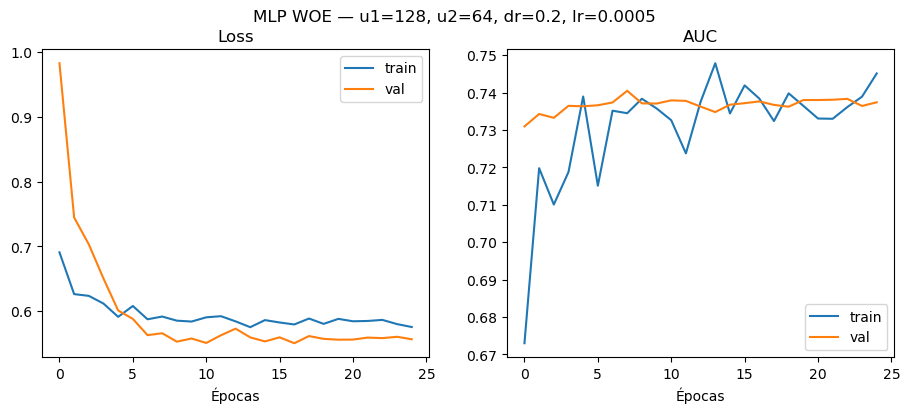

In [421]:
# Decils
dec_mlp_woe = decile_table(y_test_woe, p_te)
dec_mlp_woe.head(10)

# Graphs
def plot_history(h, title="MLP (WOE) — entrenamiento"):
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    ax[0].plot(h.history["loss"], label="train")
    ax[0].plot(h.history["val_loss"], label="val")
    ax[0].set_title("Loss"); ax[0].set_xlabel("Épocas"); ax[0].legend()
    ax[1].plot(h.history["auc"], label="train")
    ax[1].plot(h.history["val_auc"], label="val")
    ax[1].set_title("AUC"); ax[1].set_xlabel("Épocas"); ax[1].legend()
    fig.suptitle(title)
    plt.show()

plot_history(history, title=f"MLP WOE — u1={u1}, u2={u2}, dr={dr}, lr={lr}")

### 3) MLP (Raw + OHE)

In [423]:
try:
    build_mlp
except NameError:
    def build_mlp(input_dim, units1=128, units2=64, dr1=0.3, dr2=0.3, lr=1e-3, use_bn=True):
        model = keras.Sequential([layers.Input(shape=(input_dim,))])
        # Bloque 1
        model.add(layers.Dense(units1, activation="relu", kernel_initializer="he_uniform"))
        if use_bn: model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dr1))
        # Bloque 2
        model.add(layers.Dense(units2, activation="relu", kernel_initializer="he_uniform"))
        if use_bn: model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dr2))
        # Salida
        model.add(layers.Dense(1, activation="sigmoid"))
        model.compile(optimizer=keras.optimizers.Adam(lr),
                      loss="binary_crossentropy",
                      metrics=[keras.metrics.AUC(name="auc")])
        return model

grid_units1 = [64, 128]
grid_units2 = [32, 64]
grid_dr     = [0.2, 0.3, 0.4]
grid_lr     = [1e-3, 5e-4, 1e-4]

best_ohe = {"val_auc": -1.0, "params": None, "history": None, "model": None}

In [424]:
for u1 in grid_units1:
    for u2 in grid_units2:
        for dr in grid_dr:
            for lr in grid_lr:
                print(f"▶ Try (OHE): units1={u1}, units2={u2}, dropout={dr}, lr={lr}")
                model = build_mlp(X_train_ohe_dl.shape[1], u1, u2, dr, dr, lr, use_bn=True)
                es  = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
                rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5)
                hist = model.fit(
                    X_train_ohe_dl, y_train_dl,validation_split=0.2,epochs=60,batch_size=512,class_weight=class_weight_dl,
                    callbacks=[es, rlr],verbose=0)
                
                val_auc = max(hist.history.get("val_auc", [-1]))
                if val_auc > best_ohe["val_auc"]:
                    best_ohe = {"val_auc": val_auc, "params": (u1, u2, dr, lr),"history": hist,"model": model}

print(f"\n→ Best (OHE): units1={best_ohe['params'][0]}, units2={best_ohe['params'][1]}, "
      f"dropout={best_ohe['params'][2]}, lr={best_ohe['params'][3]} | val AUC={best_ohe['val_auc']:.4f}")

▶ Try (OHE): units1=64, units2=32, dropout=0.2, lr=0.001
▶ Try (OHE): units1=64, units2=32, dropout=0.2, lr=0.0005
▶ Try (OHE): units1=64, units2=32, dropout=0.2, lr=0.0001
▶ Try (OHE): units1=64, units2=32, dropout=0.3, lr=0.001
▶ Try (OHE): units1=64, units2=32, dropout=0.3, lr=0.0005
▶ Try (OHE): units1=64, units2=32, dropout=0.3, lr=0.0001
▶ Try (OHE): units1=64, units2=32, dropout=0.4, lr=0.001
▶ Try (OHE): units1=64, units2=32, dropout=0.4, lr=0.0005
▶ Try (OHE): units1=64, units2=32, dropout=0.4, lr=0.0001
▶ Try (OHE): units1=64, units2=64, dropout=0.2, lr=0.001
▶ Try (OHE): units1=64, units2=64, dropout=0.2, lr=0.0005
▶ Try (OHE): units1=64, units2=64, dropout=0.2, lr=0.0001
▶ Try (OHE): units1=64, units2=64, dropout=0.3, lr=0.001
▶ Try (OHE): units1=64, units2=64, dropout=0.3, lr=0.0005
▶ Try (OHE): units1=64, units2=64, dropout=0.3, lr=0.0001
▶ Try (OHE): units1=64, units2=64, dropout=0.4, lr=0.001
▶ Try (OHE): units1=64, units2=64, dropout=0.4, lr=0.0005
▶ Try (OHE): units1=

In [426]:
u1, u2, dr, lr = best_ohe["params"]
mlp_ohe_best = build_mlp(X_train_ohe_dl.shape[1], u1, u2, dr, dr, lr, use_bn=True)

ckpt_path_ohe = "best_mlp_ohe.h5"
cb_ohe = [callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5, verbose=1),
    callbacks.ModelCheckpoint(ckpt_path_ohe, monitor="val_loss", save_best_only=True, verbose=1)]

history_ohe = mlp_ohe_best.fit(X_train_ohe_dl, y_train_dl,validation_split=0.2,epochs=120,batch_size=512,class_weight=class_weight_dl,
    callbacks=cb_ohe,verbose=1)

print("Epoch Stop:", len(history_ohe.history["loss"]),
      "| Best val_loss:", min(history_ohe.history["val_loss"]),
      "| Checkpoint:", ckpt_path_ohe)


Epoch 1/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.5180 - loss: 0.8287
Epoch 1: val_loss improved from inf to 0.68764, saving model to best_mlp_ohe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - auc: 0.5183 - loss: 0.8277 - val_auc: 0.4303 - val_loss: 0.6876 - learning_rate: 0.0010
Epoch 2/120
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.5549 - loss: 0.7542
Epoch 2: val_loss improved from 0.68764 to 0.62983, saving model to best_mlp_ohe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - auc: 0.5543 - loss: 0.7524 - val_auc: 0.5849 - val_loss: 0.6298 - learning_rate: 0.0010
Epoch 3/120
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.5638 - loss: 0.7406
Epoch 3: val_loss did not improve from 0.62983
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.5644 - loss: 0.7385 - val_auc: 0.6264 - val_loss: 0.6335 - learning_rate: 0.0010
Epoch 4/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.5651 - loss: 0.7324
Epoch 4: val_loss did not improve from 0.62983
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.5652 - loss: 0.7319 - val_auc: 0.6316 - val_loss: 0.6528 - learning_rate: 0.0010
Epoch 5/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.6115 - loss: 0.7199
Epoch 5: val_loss improved from 0.62983 to 0.62605, saving model to best_mlp_ohe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - auc: 0.6117 - loss: 0.7191 - val_auc: 0.6521 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 6/120
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.6092 - loss: 0.7178
Epoch 6: val_loss did not improve from 0.62605
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - auc: 0.6097 - loss: 0.7167 - val_auc: 0.6553 - val_loss: 0.6410 - learning_rate: 0.0010
Epoch 7/120
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.6347 - loss: 0.6928
Epoch 7: val_loss improved from 0.62605 to 0.55688, saving model to best_mlp_ohe.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - auc: 0.6357 - loss: 0.6893 - val_auc: 0.6648 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 8/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6398 - loss: 0.7104
Epoch 8: val_loss did not improve from 0.55688
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - auc: 0.6406 - loss: 0.7067 - val_auc: 0.6641 - val_loss: 0.5731 - learning_rate: 0.0010
Epoch 9/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6473 - loss: 0.6937
Epoch 9: val_loss did not improve from 0.55688
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - auc: 0.6473 - loss: 0.6913 - val_auc: 0.6495 - val_loss: 0.6119 - learning_rate: 0.0010
Epoch 10/120
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6596 - loss: 0.6889
Epoch 10: val_loss did not improve from 0.55688
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - auc: 0.6592 - loss: 0.6866 - val_auc: 0.6535 - val_loss: 0.6314 - learning_rate: 0.0010
Epoch 11/120
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6484 - loss: 0.6949
Epoch 11: Re

AUC  Train (OHE): 0.6834 | Test: 0.6841
KS   Train (OHE): 0.2953 | Test: 0.2991
Gini Train (OHE): 0.3667 | Test: 0.3681


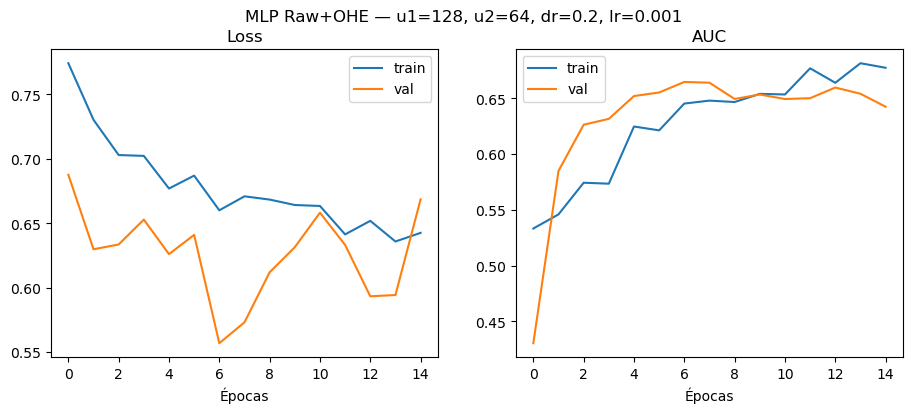

In [427]:
import matplotlib.pyplot as plt

# Predictions
p_tr = mlp_ohe_best.predict(X_train_ohe_dl, verbose=0).ravel()
p_te = mlp_ohe_best.predict(X_test_ohe_dl,  verbose=0).ravel()

# Metrics
from sklearn.metrics import roc_auc_score, roc_curve
auc_tr = roc_auc_score(y_train_dl, p_tr);  auc_te = roc_auc_score(y_test_dl, p_te)
fpr_tr, tpr_tr, _ = roc_curve(y_train_dl, p_tr);  fpr_te, tpr_te, _ = roc_curve(y_test_dl, p_te)
ks_tr = (tpr_tr - fpr_tr).max();            ks_te = (tpr_te - fpr_te).max()
gini_tr = 2*auc_tr - 1;                     gini_te = 2*auc_te - 1

print(f"AUC  Train (OHE): {auc_tr:.4f} | Test: {auc_te:.4f}")
print(f"KS   Train (OHE): {ks_tr:.4f} | Test: {ks_te:.4f}")
print(f"Gini Train (OHE): {gini_tr:.4f} | Test: {gini_te:.4f}")

# Deciles
dec_mlp_ohe = decile_table(y_test_dl, p_te)
dec_mlp_ohe.head(10)

# Graphs
def plot_history(h, title="MLP (Raw+OHE) — entrenamiento"):
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    ax[0].plot(h.history["loss"], label="train")
    ax[0].plot(h.history["val_loss"], label="val")
    ax[0].set_title("Loss"); ax[0].set_xlabel("Épocas"); ax[0].legend()
    ax[1].plot(h.history["auc"], label="train")
    ax[1].plot(h.history["val_auc"], label="val")
    ax[1].set_title("AUC"); ax[1].set_xlabel("Épocas"); ax[1].legend()
    fig.suptitle(title)
    plt.show()

plot_history(history_ohe, title=f"MLP Raw+OHE — u1={u1}, u2={u2}, dr={dr}, lr={lr}")


# Results

## Best Model

In [513]:
y_true = y_test.values if hasattr(y_test, "values") else y_test
p_hat  = test_df["PD_model"].values  # prob. de default del modelo (mayor = más riesgo)
bins   = 10

dfd = pd.DataFrame({"y": y_true, "p": p_hat}).copy()
# qcut etiqueta deciles ascendentes; invertimos para que 1=alto riesgo
q = pd.qcut(dfd["p"], q=bins, labels=False, duplicates="drop")  # 0..bins-1
dfd["decile"] = (bins - q).astype(int)                         # 1..bins

overall_rate = dfd["y"].mean()
tot_e = dfd["y"].sum()
tot_ne = len(dfd) - tot_e

tab = (dfd.groupby("decile", as_index=False)
          .agg(n=("y","size"),
               events=("y","sum"),
               avg_score=("p","mean"))
          .sort_values("decile"))

tab["non_events"] = tab["n"] - tab["events"]
tab["event_rate"] = tab["events"] / tab["n"]
tab["lift"] = tab["event_rate"] / overall_rate if overall_rate > 0 else np.nan

tab["cum_n"] = tab["n"].cumsum()
tab["cum_events"] = tab["events"].cumsum()
tab["cum_non_events"] = tab["non_events"].cumsum()
tab["cum_pct_pop"] = tab["cum_n"] / len(dfd)
tab["cum_pct_events"] = tab["cum_events"] / tot_e if tot_e > 0 else np.nan
tab["cum_tpr"] = tab["cum_events"] / tot_e if tot_e > 0 else np.nan   # sensibilidad acumulada
tab["cum_fpr"] = tab["cum_non_events"] / tot_ne if tot_ne > 0 else np.nan
tab["ks_by_decile"] = (tab["cum_tpr"] - tab["cum_fpr"]).abs()

print("Tabla de deciles (Test) — 1 = High Risk")
display(tab[["decile","n","events","non_events","avg_score","event_rate","lift","cum_pct_pop","cum_pct_events","ks_by_decile"]])

print(f"\nKS por decil (máximo): {tab['ks_by_decile'].max():.4f} en decil {int(tab.loc[tab['ks_by_decile'].idxmax(),'decile'])}")


Tabla de deciles (Test) — 1 = High Risk


,decile,n,events,non_events,avg_score,event_rate,lift,cum_pct_pop,cum_pct_events,ks_by_decile
0,1,1407,62,1345,0.045434,0.044065,3.090538,0.096914,0.299517,0.205533
1,2,1460,40,1420,0.028269,0.027397,1.921514,0.197479,0.492754,0.299546
2,3,1487,43,1444,0.021884,0.028917,2.028121,0.299904,0.700483,0.406374
3,4,1201,19,1182,0.015362,0.015820,1.109550,0.382628,0.792271,0.415567
4,5,1676,12,1664,0.011763,0.007160,0.502162,0.498071,0.850242,0.357264
5,6,1470,10,1460,0.009327,0.006803,0.477111,0.599325,0.898551,0.303554
6,7,1435,16,1419,0.007601,0.011150,0.781996,0.698168,0.975845,0.281694
7,8,1478,5,1473,0.004836,0.003383,0.237264,0.799972,1.000000,0.202921
8,9,1446,0,1446,0.001158,0.000000,0.000000,0.899573,1.000000,0.101880
9,10,1458,0,1458,0.000008,0.000000,0.000000,1.000000,1.000000,0.000000



KS por decil (máximo): 0.4156 en decil 4
